#  CM3060 Natural Language Processing - Midterms

## Comparative text classification using Statistical and Embedding-based models

## Text Classification of News Articles

### I. Introduction



1.   <b>Domain-specific area </b>

    In the modern digital era, the sheer volume of news articles published daily can be overwhelming for readers. The need for effective categorization of these articles into specific topics is critical to ensure that readers can quickly access and digest relevant information. The problem at hand is to develop a robust text classification system capable of automatically categorizing news articles into predefined classes: World, Sports, Business, and Sci/Tech.

2.   <b>Objectives</b>

    <b>Goals of Exploring Statistical and Embedding-Based Models</b><br>
    The primary objective of this coursework is to explore the effectiveness and applicability of both statistical and embedding-based models in the task of text classification, particularly for categorizing news articles into predefined classes: World, Sports, Business, and Sci/Tech.<br>
    <br>
    <b>Description of Models</b><br>
* Baseline Model (Bag of Words + Naive Bayes): <br>The baseline model
utilizes the Bag of Words (BoW) representation to convert text into numerical features by counting word occurrences. This simple representation is then fed into a Naive Bayes classifier, a probabilistic model that assumes feature independence.

* Statistical Model (Term Frequency-Inverse Document Frequency (TF-IDF) + Support Vector Machine (SVM)): <br>This model uses Term Frequency-Inverse Document Frequency (TF-IDF) to weigh the importance of words in the document corpus. The TF-IDF features are then used to train a Logistic Regression or Support Vector Machine (SVM) classifier, both of which are powerful statistical learning methods.

* Embedding-Based Model (Word2Vec +  Long Short-Term Memory (LSTM)): <br>
The embedding-based model employs Word2Vec to generate dense, continuous vector representations of words that capture semantic relationships. These word embeddings are input into a Long Short-Term Memory (LSTM) network, a type of recurrent neural network (RNN) capable of capturing long-term dependencies and sequential patterns in text.

3. <b>Dataset Description </b>
    The AG's News Topic Classification Dataset is a comprehensive collection of news articles, categorized into four balanced classes: World, Sports, Business, and Sci/Tech. It contains 120,000 training samples and 7,600 testing samples, making it suitable for training and evaluating a variety of machine learning models, including deep learning approaches.

    Each sample includes both a title and a description, providing rich text data for feature engineering. The dataset's real-world relevance is enhanced by its origin from actual news sources, offering a practical foundation for applications in news categorization and information retrieval.

    Widely used in academic research, this dataset allows for benchmarking against established baselines, fostering comparative performance analysis. Its availability on platforms like Kaggle ensures easy access for educational and research purposes, making it an excellent choice for advancing natural language processing and text classification skills.

    <b>Category Mapping:</b>

    * 1 - World
    * 2 - Sports
    * 3 - Business
    * 4 - Sci/Tech

    <b>Dataset Structure:

    * Category: The category label for the news article.
    * Title: The title of the news article.
    * Description: A brief description or the content of the news article.
        
    <b>Data Summary:

    * Training Samples: 120,000
    * Testing Samples: 7,600
        
    Link: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset/data?select=test.csv

3. <b>Evaluation Methodology </b>

    ##### Metrics for Assessing Model Performance

    1. Accuracy: Measures the ratio of correctly predicted instances to total instances.
    * Formula: Accuracy = Correct Predictions/ Total Predictions
    * Application: Overall model performance.

    2. Precision: Measures the ratio of correctly predicted positive observations to the total predicted positives.
    * Formula:  Precision = True Positives/ True Positives + False Positives
    * Application: Important when the cost of false positives is high.

    3. Recall: Measures the ratio of correctly predicted positive observations to all observations in the actual class.
    * Formula:  Precision = True Positives/ True Positives + False Negatives
    * Application: Important when the cost of false negatives is high.

    4. F1-Score: The harmonic mean of precision and recall.
    * Formula: F1-Score = 2 × Precision × Recall/  Precision + Recall
    * Application: Useful for evaluating models with imbalanced classes.

    5. Confusion Matrix: Displays actual versus predicted classifications.
    *  Components: True Positives (TP), False Positives (FP), True Negatives  (TN), False Negatives (FN).
    * Application: Visualizes model performance and misclassification types.

By applying these metrics, we can effectively compare the baseline, statistical, and embedding-based models to determine their effectiveness and applicability in text classification tasks.







---



### II. Implementation


#### 5. Data Preprocessing

In [1]:
# Importing necessary libraries

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter

# Machine learning and evaluation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep learning
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from keras.optimizers import Adam
from keras.utils import to_categorical

# Word2Vec
from gensim.models import Word2Vec

# Dimensionality reduction for visualization
from sklearn.manifold import TSNE

In [2]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train Dataset Preprocess and visualization

In [4]:
## Load train Dataset
train_dataset = pd.read_csv(r"/content/sample_data/data/train.csv")
train_dataset.head(5)

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [5]:
# Mapping Class Index to Category
category_mapping = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}
train_dataset['Category'] = train_dataset['Class Index'].map(category_mapping)

# Display the first few rows to verify the mapping
train_dataset.head(5)

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  Category  
0  Reuters - Short-sellers, Wall Street's dwindli...  Business  
1  Reuters - Private investment firm Carlyle Grou...  Business  
2  Reuters - Soaring crude prices plus worries\ab...  Business  
3  Reuters - Authorities have halted oil export\f...  Business  
4  AFP - Tearaway world oil prices, toppling reco...  Business

In [6]:
# Rename 'Class Index' to 'CategoryID'
train_dataset.rename(columns={'Class Index': 'CategoryID'}, inplace=True)

# Rearrange the columns to Category, CategoryID, Title, Description
train_dataset = train_dataset[['Category', 'CategoryID', 'Title', 'Description']]

train_dataset.head(5)

Category  CategoryID                                              Title  \
0  Business           3  Wall St. Bears Claw Back Into the Black (Reuters)   
1  Business           3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Business           3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3  Business           3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Business           3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [7]:
# Combine Title and Description into a single text field
train_dataset['Text'] = train_dataset['Title'] + ' ' + train_dataset['Description']

# Adjust Pandas settings to display full text
pd.set_option('display.max_colwidth', None)

# Display the first few rows to verify the changes
train_dataset.head()

Category  CategoryID  \
0  Business           3   
1  Business           3   
2  Business           3   
3  Business           3   
4  Business           3   

                                                                       Title  \
0                          Wall St. Bears Claw Back Into the Black (Reuters)   
1                        Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                            Oil and Economy Cloud Stocks' Outlook (Reuters)   
3               Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4  Oil prices soar to all-time record, posing new menace to US economy (AFP)   

                                                                                                                                                                                                              Description  \
0                                                                                                                          Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.   
1  Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.   
2                                Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.   
3                     Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.   
4                                                        AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.   

                                                                                                                                                                                                                                                                         Text  
0                                                                                                                            Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.  
1  Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.  
2                                    Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.  
3            Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.  
4                                  Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.

The text data was prepared in a way that maximizes the amount of useful information available for the text classification models, thereby potentially improving their performance.

In [8]:
# Shape of Dataset
train_dataset.shape

(120000, 5)

In [9]:
# Information of Columns of Dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Category     120000 non-null  object
 1   CategoryID   120000 non-null  int64 
 2   Title        120000 non-null  object
 3   Description  120000 non-null  object
 4   Text         120000 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


In [10]:
# Count Values of Categories
train_dataset['Category'].value_counts()

Category
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64

### Data Visualization

The objective of data visualization is to gain insights into the distribution and characteristics of the dataset. By visualizing the data, we can understand the balance of categories, identify potential issues, and make informed decisions about preprocessing and model building.

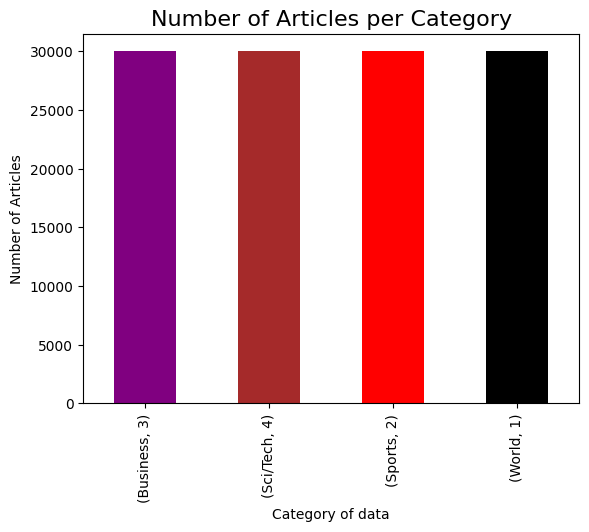

In [ ]:
#Visualizing Data
train_dataset.groupby('Category').CategoryID.value_counts().plot(kind = "bar", color = ["purple", "brown", "red", "black"])
plt.xlabel("Category of data")
plt.ylabel('Number of Articles')
plt.title("Number of Articles per Category",fontsize=16)
plt.show()

The bar plot indicates the number of articles in each category (Business, Sci/Tech, Sports, World). It shows whether the dataset is balanced or if certain categories are overrepresented, which can affect the performance of classification models.
* World: 3000 articles
* Sports: 3000 articles
* Business: 3000 articles
* Sci/Tech: 3000 articles

The categories are balanced, which is good for training a model as it prevents a significant bias towards a particular class.

In [ ]:
train_dataset['text_length'] = train_dataset['Text'].apply(len)
text_length_stats = train_dataset['text_length'].describe()

text_length_stats

count    120000.000000
mean        236.460025
std          66.529799
min          17.000000
25%         196.000000
50%         232.000000
75%         266.000000
max        1012.000000
Name: text_length, dtype: float64

#### Analysis
<b>Balance:</b> The categories are relatively balanced, which helps in training a model without significant bias toward any particular class. <br>
<b>Variability:</b> There is considerable variability in the text lengths, as indicated by the high standard deviation of 66.52 characters.<br>
<b>Range:</b> Articles range from 17 characters (shortest) to  1012 characters (longest), suggesting some articles are significantly longer than others.

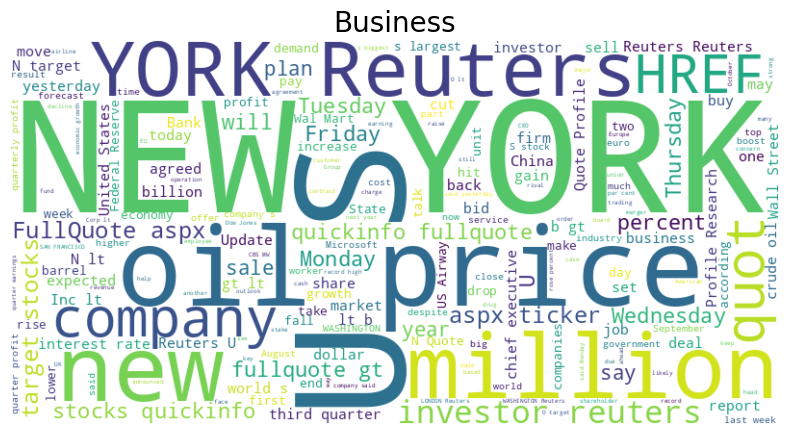

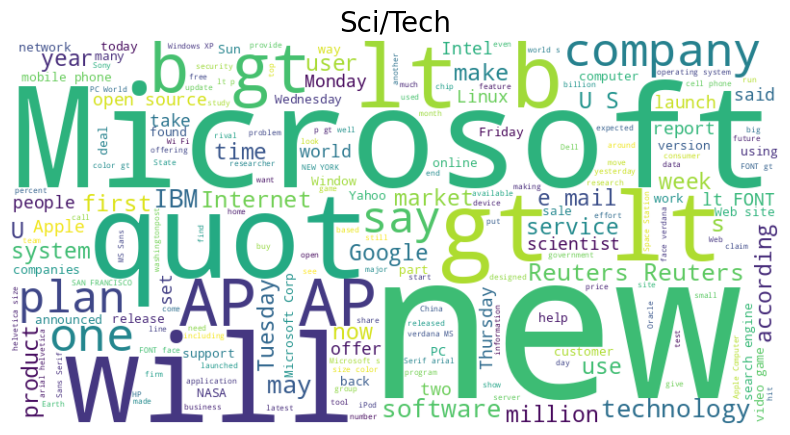

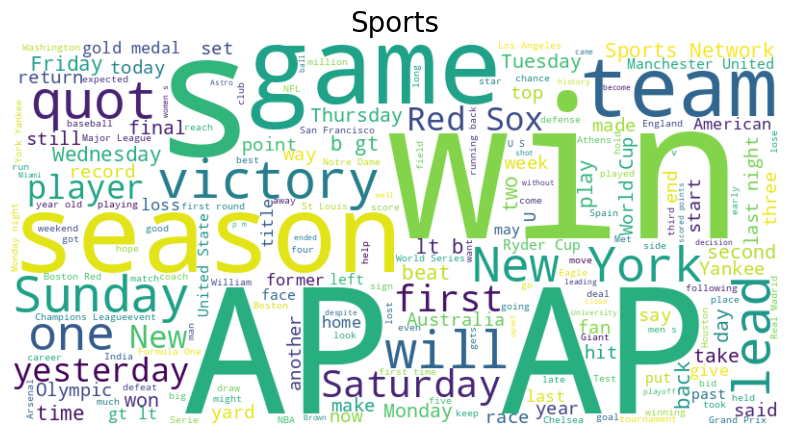

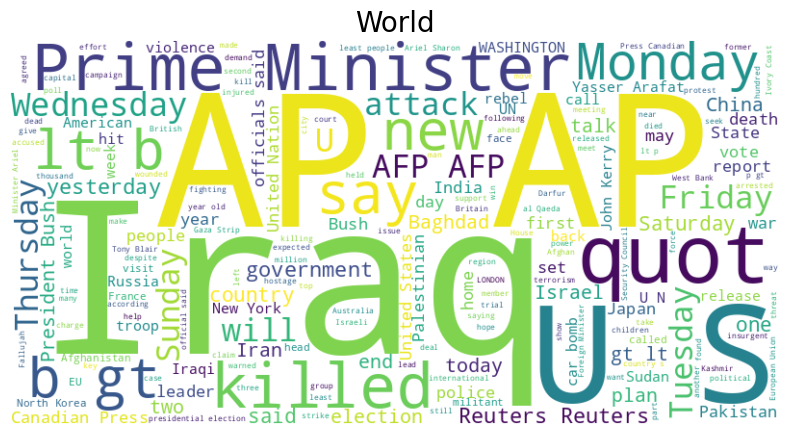

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds for each category
categories = train_dataset['Category'].unique()
for category in categories:
    text = " ".join(train_dataset[train_dataset['Category'] == category]['Text'])
    generate_wordcloud(text, title=category)

Word Clouds for Each Category will help to see the most frequent words associated with each category, providing insights into the data.

In [11]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# The preprocessing function for Train Data

In [12]:
# Define the preprocessing function
def preprocess_text(text):

    # Remove HTML tags
    # Removing tags (HTML or XML) from text data is a crucial pre-processing step in NLP to ensure clean and consistent text data, which leads to improved model performance.
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters
    # Removing special characters ensures that the text data is clean and focused on meaningful words, which improves the accuracy and efficiency of NLP models.
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Convert to lowercase
    # Converting text to lowercase ensures uniformity and helps in accurate text analysis by avoiding case-sensitive mismatches
    text = text.lower()

    # Tokenize
    # Tokenization breaks down text into individual words or tokens, facilitating more accurate text analysis and model training
    words = text.split()

    # Remove stopwords
    # Removing stopwords eliminates common words that do not contribute to the meaning of the text, improving the focus on significant terms for analysis.
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    # Lemmatizing reduces words to their base or root form, ensuring consistency and improving the model's ability to understand and analyze the text.
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)  # Join words back into a single string


train_dataset['Text'] = train_dataset['Title'] + ' ' + train_dataset['Description']


#'Text' column are strings
train_dataset['Text'] = train_dataset['Text'].astype(str)

# Apply the preprocessing function to the 'Text' column
train_dataset['Text'] = train_dataset['Text'].apply(preprocess_text)

# Pandas settings to display full text
pd.set_option('display.max_colwidth', None)


train_dataset.head(5)


Category  CategoryID  \
0  Business           3   
1  Business           3   
2  Business           3   
3  Business           3   
4  Business           3   

                                                                       Title  \
0                          Wall St. Bears Claw Back Into the Black (Reuters)   
1                        Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                            Oil and Economy Cloud Stocks' Outlook (Reuters)   
3               Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4  Oil prices soar to all-time record, posing new menace to US economy (AFP)   

                                                                                                                                                                                                              Description  \
0                                                                                                                          Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.   
1  Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.   
2                                Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.   
3                     Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.   
4                                                        AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.   

                                                                                                                                                                                                                        Text  
0                                                                                                               wall st bear claw back black reuters reuters shortsellers wall street dwindlingband ultracynics seeing green  
1  carlyle look toward commercial aerospace reuters reuters private investment firm carlyle groupwhich reputation making welltimed occasionallycontroversial play defense industry quietly placedits bet another part market  
2                                             oil economy cloud stock outlook reuters reuters soaring crude price plus worriesabout economy outlook earnings expected tohang stock market next week depth thesummer doldrums  
3      iraq halt oil export main southern pipeline reuters reuters authority halted oil exportflows main pipeline southern iraq afterintelligence showed rebel militia could strikeinfrastructure oil official said saturday  
4                         oil price soar alltime record posing new menace u economy afp afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election



---



# Test Dataset Preprocess and visualization

In [18]:
# Load test  Dataset
test_dataset = pd.read_csv(r"/content/sample_data/data/test.csv")
test_dataset.head(5)

Class Index  \
0            3   
1            4   
2            4   
3            4   
4            4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.  
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.  
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.  
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.  
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.

In [19]:
# Mapping Class Index to Category
category_mapping = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}
test_dataset['Category'] = test_dataset['Class Index'].map(category_mapping)

# Display the first few rows to verify the mapping
test_dataset.head(5)

Class Index  \
0            3   
1            4   
2            4   
3            4   
4            4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  \
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.   
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.   
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.   
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.   
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.   

   Category  
0  Business  
1  Sci/Tech  
2  Sci/Tech  
3  Sci/Tech  
4  Sci/Tech

In [20]:
# Rename 'Class Index' to 'CategoryID'
test_dataset.rename(columns={'Class Index': 'CategoryID'}, inplace=True)

# Rearrange the columns to Category, CategoryID, Title, Description
test_dataset = test_dataset[['Category', 'CategoryID', 'Title', 'Description']]

test_dataset.head(5)

Category  CategoryID  \
0  Business           3   
1  Sci/Tech           4   
2  Sci/Tech           4   
3  Sci/Tech           4   
4  Sci/Tech           4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.  
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.  
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.  
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.  
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.

In [21]:
# Combine Title and Description into a single text field
test_dataset['Text'] = test_dataset['Title'] + ' ' + test_dataset['Description']

# Adjust Pandas settings to display full text
pd.set_option('display.max_colwidth', None)

# Display the first few rows to verify the changes
test_dataset.head()

Category  CategoryID  \
0  Business           3   
1  Sci/Tech           4   
2  Sci/Tech           4   
3  Sci/Tech           4   
4  Sci/Tech           4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  \
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.   
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.   
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.   
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.   
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.   

                                                                                                                                                                                                                                                                                                                                Text  
0                                                                                                                                                                  Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.  
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.  
2                                                               Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.  
3     Prediction Unit Helps Forecast Wildfires (AP) AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will

In [ ]:
# Shape of Dataset
test_dataset.shape

(7600, 5)

In [ ]:
# Information of Columns of Dataset
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     7600 non-null   object
 1   CategoryID   7600 non-null   int64 
 2   Title        7600 non-null   object
 3   Description  7600 non-null   object
 4   Text         7600 non-null   object
dtypes: int64(1), object(4)
memory usage: 297.0+ KB


In [ ]:
# Count Values of Categories
test_dataset['Category'].value_counts()

Category
Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: count, dtype: int64

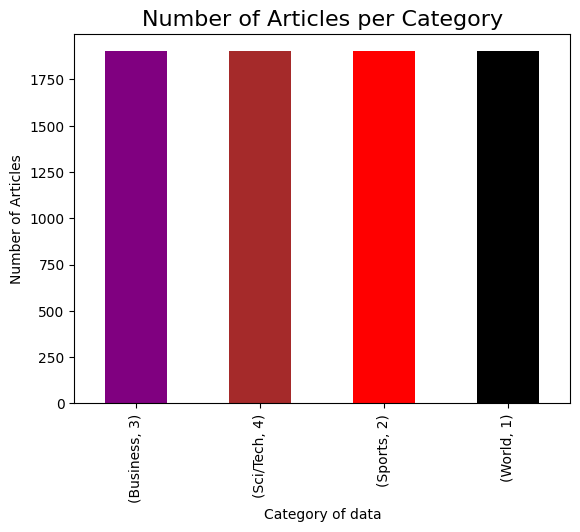

In [ ]:
#Visualizing Data
test_dataset.groupby('Category').CategoryID.value_counts().plot(kind = "bar", color = ["purple", "brown", "red", "black"])
plt.xlabel("Category of data")
plt.ylabel('Number of Articles')
plt.title("Number of Articles per Category",fontsize=16)
plt.show()

In [ ]:
test_dataset['text_length'] = test_dataset['Text'].apply(len)
text_length_stats = test_dataset['text_length'].describe()

text_length_stats

count    7600.000000
mean      235.290395
std        65.299706
min       100.000000
25%       196.750000
50%       231.000000
75%       266.000000
max       892.000000
Name: text_length, dtype: float64

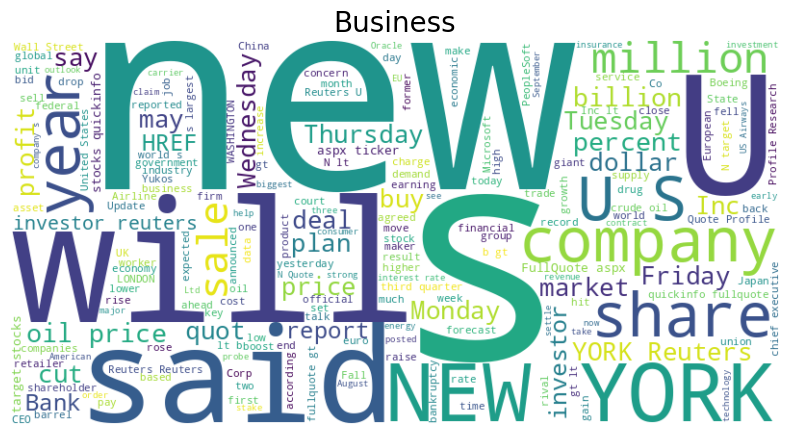

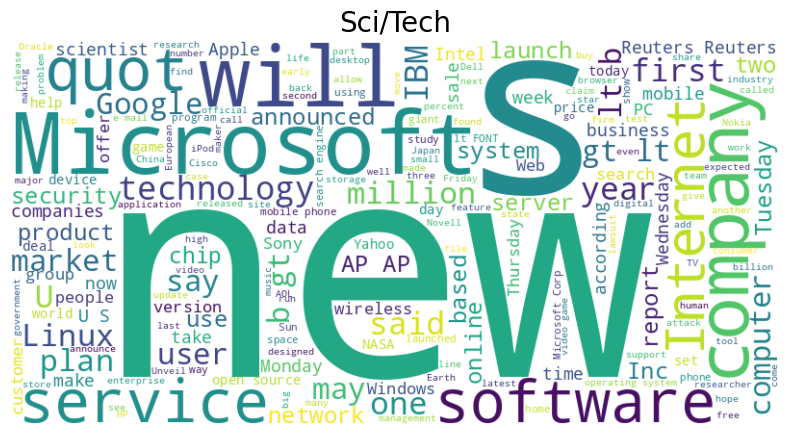

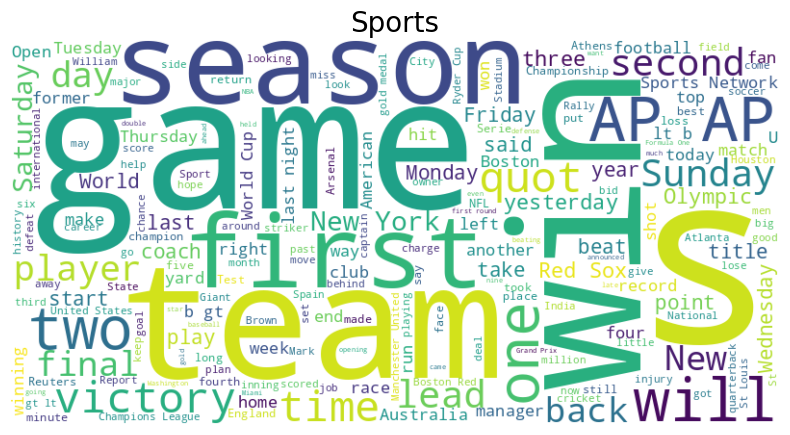

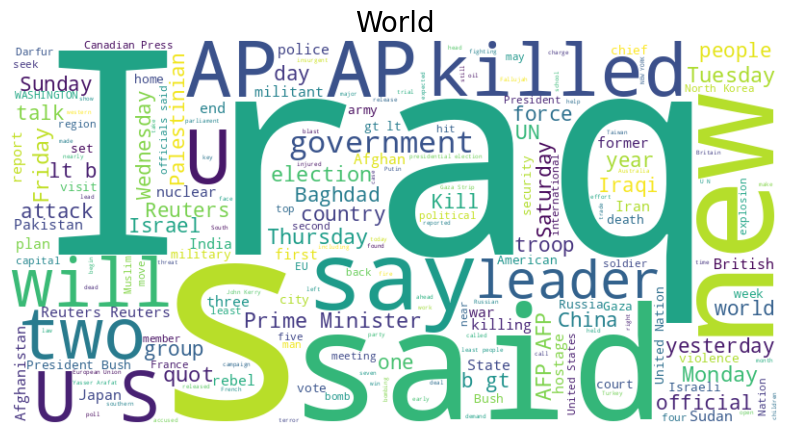

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds for each category
categories = test_dataset['Category'].unique()
for category in categories:
    text = " ".join(test_dataset[test_dataset['Category'] == category]['Text'])
    generate_wordcloud(text, title=category)

# The preprocessing function for Test Data

In [22]:
# Define the preprocessing function
def preprocess_text(text):

    # Remove HTML tags
    # Removing tags (HTML or XML) from text data is a crucial pre-processing step in NLP to ensure clean and consistent text data, which leads to improved model performance.
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters
    # Removing special characters ensures that the text data is clean and focused on meaningful words, which improves the accuracy and efficiency of NLP models.
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Convert to lowercase
    # Converting text to lowercase ensures uniformity and helps in accurate text analysis by avoiding case-sensitive mismatches
    text = text.lower()

    # Tokenize
    # Tokenization breaks down text into individual words or tokens, facilitating more accurate text analysis and model training
    words = text.split()

    # Remove stopwords
    # Removing stopwords eliminates common words that do not contribute to the meaning of the text, improving the focus on significant terms for analysis.
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    # Lemmatizing reduces words to their base or root form, ensuring consistency and improving the model's ability to understand and analyze the text.
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)  # Join words back into a single string


test_dataset['Text'] = test_dataset['Title'] + ' ' + test_dataset['Description']


#'Text' column are strings
test_dataset['Text'] = test_dataset['Text'].astype(str)

# Apply the preprocessing function to the 'Text' column
test_dataset['Text'] = test_dataset['Text'].apply(preprocess_text)

# Pandas settings to display full text
pd.set_option('display.max_colwidth', None)


test_dataset.head(5)


Category  CategoryID  \
0  Business           3   
1  Sci/Tech           4   
2  Sci/Tech           4   
3  Sci/Tech           4   
4  Sci/Tech           4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  \
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.   
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.   
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.   
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.   
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.   

                                                                                                                                                                                                                                                              Text  
0                                                                                                                                             fear n pension talk union representing worker turner newall say disappointed talk stricken parent firm federal mogul  
1  race second private team set launch date human spaceflight spacecom spacecom toronto canada secondteam rocketeers competing 3610 million ansari x prize contest forprivately funded suborbital space flight officially announced firstlaunch date manned rocket  
2                                                                  ky company win grant study peptide ap ap company founded chemistry researcher university louisville grant develop method producing better peptide short chain amino acid building block protein  
3                                          prediction unit help forecast wildfire ap ap barely dawn mike fitzpatrick start shift blur colorful map figure endless chart already know day bring lightning strike place expects wind pick moist place dry flame roar  
4                                                                              calif aim limit farmrelated smog ap ap southern california smogfighting agency went emission bovine variety friday adopting nation first rule reduce air pollution dairy cow manure



---



---



## 6. Baseline performance

<b>Naive Bayes with Bag of Words (BoW) </b> <br>
To establish a baseline performance, we will use a simple and commonly used text classification approach: the Naive Bayes classifier with a Bag of Words (BoW) representation. This baseline will serve as a meaningful benchmark against which we can compare the performance of more advanced models.

In [ ]:
# Vectorize the text using Bag of Words
vectorizer = CountVectorizer(max_features=120000)
X_train_bow = vectorizer.fit_transform(train_dataset['Text'])
X_test_bow = vectorizer.transform(test_dataset['Text'])
# Converts the text data into a BoW representation, where each text is represented as a vector of word counts

In [ ]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, train_dataset['CategoryID'])
# Trains a Multinomial Naive Bayes classifier using the training data.

MultinomialNB()

In [ ]:
# Predict on the test set
y_test_pred = nb_classifier.predict(X_test_bow)
# Uses the trained model to predict the categories of the test set.

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_dataset['CategoryID'], y_test_pred)
classification_rep = classification_report(test_dataset['CategoryID'], y_test_pred, target_names=['World', 'Sports', 'Business', 'Sci/Tech'])


In [ ]:
# Print the results
print(f"Naive Bayes Classifier (BoW) - Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Naive Bayes Classifier (BoW) - Accuracy: 0.9039473684210526
Classification Report:
               precision    recall  f1-score   support

       World       0.91      0.90      0.90      1900
      Sports       0.95      0.98      0.97      1900
    Business       0.87      0.86      0.86      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



The Logistic Regression classifier achieved an overall accuracy of approximately 90.39%.

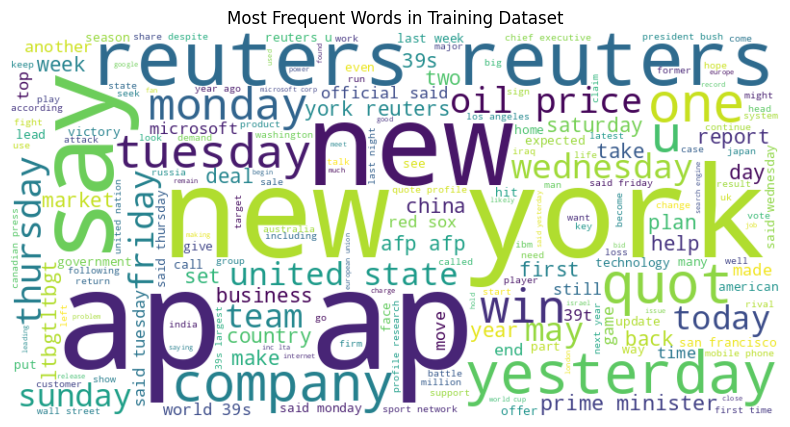

In [ ]:

# Combine all text from the training dataset into one large string
all_text = ' '.join(train_dataset['Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Training Dataset')
plt.show()


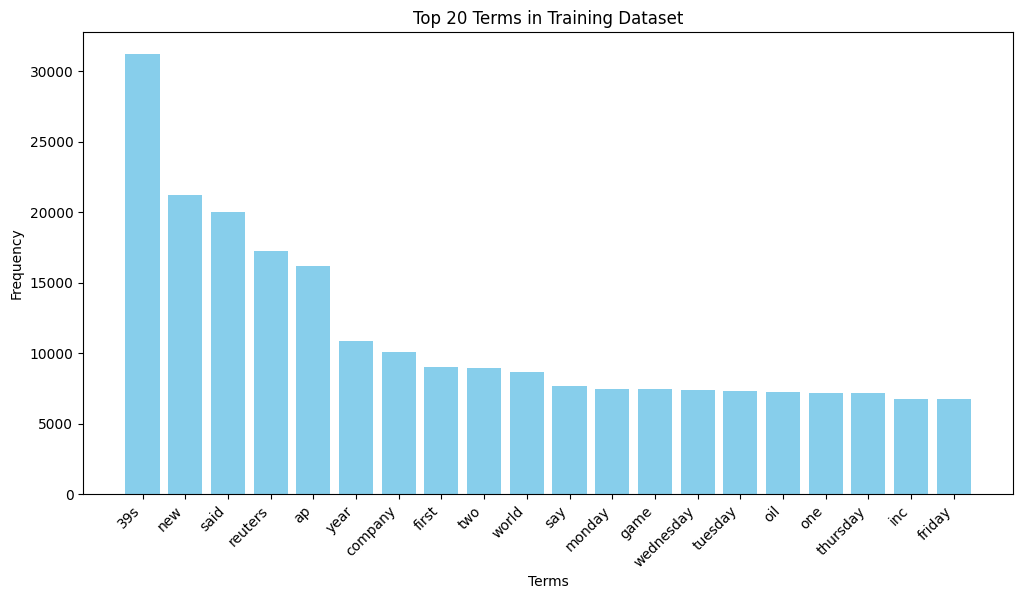

In [ ]:
# Get the term frequencies
term_frequencies = np.asarray(X_train_bow.sum(axis=0)).flatten()
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
term_freq_df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})
term_freq_df = term_freq_df.sort_values(by='frequency', ascending=False).head(20)  # Top 20 terms

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(term_freq_df['term'], term_freq_df['frequency'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top 20 Terms in Training Dataset')
plt.show()


## Overall Performance:

In [ ]:
# Create a DataFrame for the actual and predicted categories
comparison_df = pd.DataFrame({'Actual': test_dataset['CategoryID'], 'Predicted': y_test_pred})

# Print total number of samples
print(f"Total samples in y_test: {len(test_dataset['CategoryID'])}")
print(f"Total samples in y_test_pred: {len(y_test_pred)}")


Total samples in y_test: 7600
Total samples in y_test_pred: 7600


In [ ]:
# Get the counts of actual and predicted categories
actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})
counts_df

Actual  Predicted
1    1900       1866
2    1900       1959
3    1900       1868
4    1900       1907

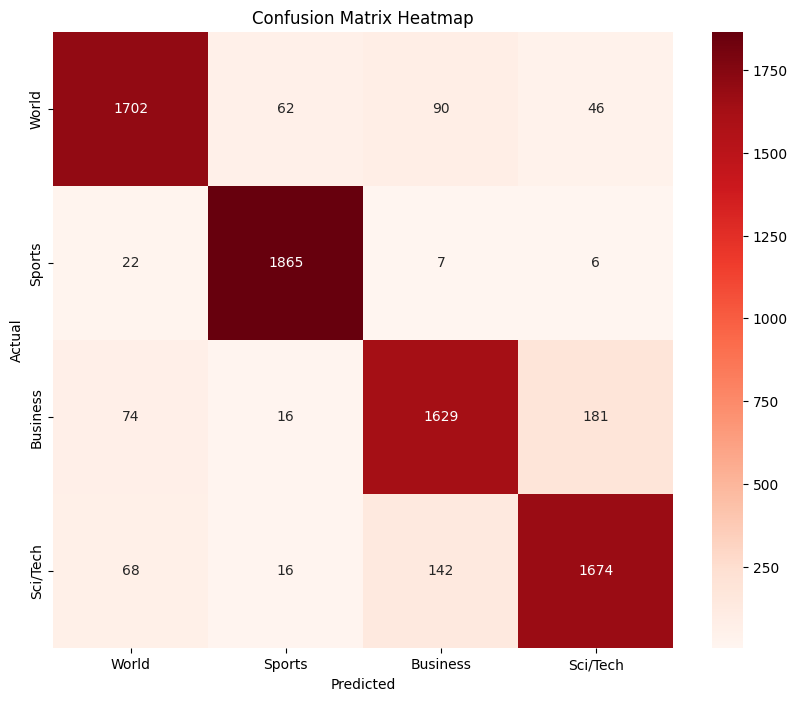

In [ ]:

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_dataset['CategoryID'], y_test_pred)

# Define category labels
category_labels = ['World', 'Sports', 'Business', 'Sci/Tech']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Analysis of Confusion Matrix Heatmap

The confusion matrix heatmap visualizes the performance of Naive Bayes classifier using the Bag of Words (BoW) representation. Here's an analysis of the heatmap:

#### Detailed Analysis

1. **World Category**:
   - **True Positives (TP)**: 1702 instances were correctly classified as 'World'.
   - **False Positives (FP)**: 62 instances were incorrectly classified as 'World' but belong to other categories.
   - **False Negatives (FN)**: 136 instances (90 'Business' and 46 'Sci/Tech') that should be 'World' were misclassified as other categories.

2. **Sports Category**:
   - **True Positives (TP)**: 1865 instances were correctly classified as 'Sports'.
   - **False Positives (FP)**: 22 instances were incorrectly classified as 'Sports' but belong to other categories.
   - **False Negatives (FN)**: 13 instances (7 'Business' and 6 'Sci/Tech') that should be 'Sports' were misclassified as other categories.

3. **Business Category**:
   - **True Positives (TP)**: 1629 instances were correctly classified as 'Business'.
   - **False Positives (FP)**: 16 instances were incorrectly classified as 'Business' but belong to other categories.
   - **False Negatives (FN)**: 271 instances (74 'World', 16 'Sports', and 181 'Sci/Tech') that should be 'Business' were misclassified as other categories.

4. **Sci/Tech Category**:
   - **True Positives (TP)**: 1674 instances were correctly classified as 'Sci/Tech'.
   - **False Positives (FP)**: 68 instances were incorrectly classified as 'Sci/Tech' but belong to other categories.
   - **False Negatives (FN)**: 158 instances (16 'Sports' and 142 'Business') that should be 'Sci/Tech' were misclassified as other categories.

#### Observations

1. **High True Positive Rates**:
   - The classifier performs well for 'World' and 'Sports' categories, with high true positive rates (1702 and 1865, respectively).

2. **Misclassifications**:
   - There are notable misclassifications between 'Business' and 'Sci/Tech'. This might indicate that the features distinguishing these categories are not as clear, leading to confusion.

3. **Relatively Low False Positive Rates**:
   - The false positive rates are relatively low across all categories, indicating that the classifier is not over-predicting any particular category.



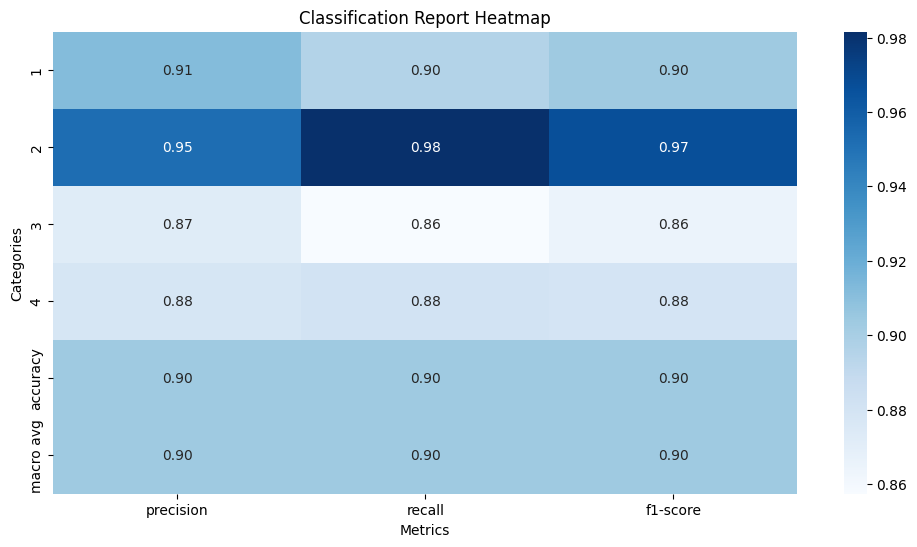

In [ ]:

# Generate the classification report as a dictionary
report_dict = classification_report(test_dataset['CategoryID'], y_test_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Categories')
plt.show()


### Analysis of Classification Report Heatmap

The classification report heatmap provides a detailed view of the performance of Naive Bayes model using the Bag of Words (BoW) representation across different categories and metrics. Here’s an analysis based on the heatmap:

#### Metrics Explanation

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions.
- **Recall**: The ratio of correctly predicted positive observations to the all observations in the actual class. It measures the ability of the model to find all the relevant cases within a dataset.
- **F1-Score**: The weighted average of Precision and Recall. It provides a balance between precision and recall.


#### Analysis

1. **World Category (1)**:
   - **Precision**: 0.91
   - **Recall**: 0.90
   - **F1-Score**: 0.90
   - **Analysis**: The model performs well in predicting the 'World' category with high precision and recall, indicating it accurately identifies most 'World' articles and correctly classifies most of its predictions as 'World'.

2. **Sports Category (2)**:
   - **Precision**: 0.95
   - **Recall**: 0.98
   - **F1-Score**: 0.97
   - **Analysis**: The model excels in predicting the 'Sports' category with the highest precision, recall, and F1-score among all categories. This indicates a strong ability to correctly identify and predict 'Sports' articles.

3. **Business Category (3)**:
   - **Precision**: 0.87
   - **Recall**: 0.86
   - **F1-Score**: 0.86
   - **Analysis**: The model's performance in predicting the 'Business' category is slightly lower compared to 'World' and 'Sports', with precision and recall around 0.86. This suggests some difficulty in accurately classifying 'Business' articles, possibly due to overlap with other categories.

4. **Sci/Tech Category (4)**:
   - **Precision**: 0.88
   - **Recall**: 0.88
   - **F1-Score**: 0.88
   - **Analysis**: The model shows consistent performance in predicting the 'Sci/Tech' category with balanced precision and recall. It indicates that the model is fairly good at identifying and predicting 'Sci/Tech' articles.

5. **Macro Average (macro avg)**:
   - **Precision**: 0.90
   - **Recall**: 0.90
   - **F1-Score**: 0.90
   - **Analysis**: The macro average provides a general performance measure across all categories. The model maintains a good balance between precision and recall with an overall F1-score of 0.90, indicating robust performance.


Total samples in y_test: 7600
Total samples in y_test_pred: 7600


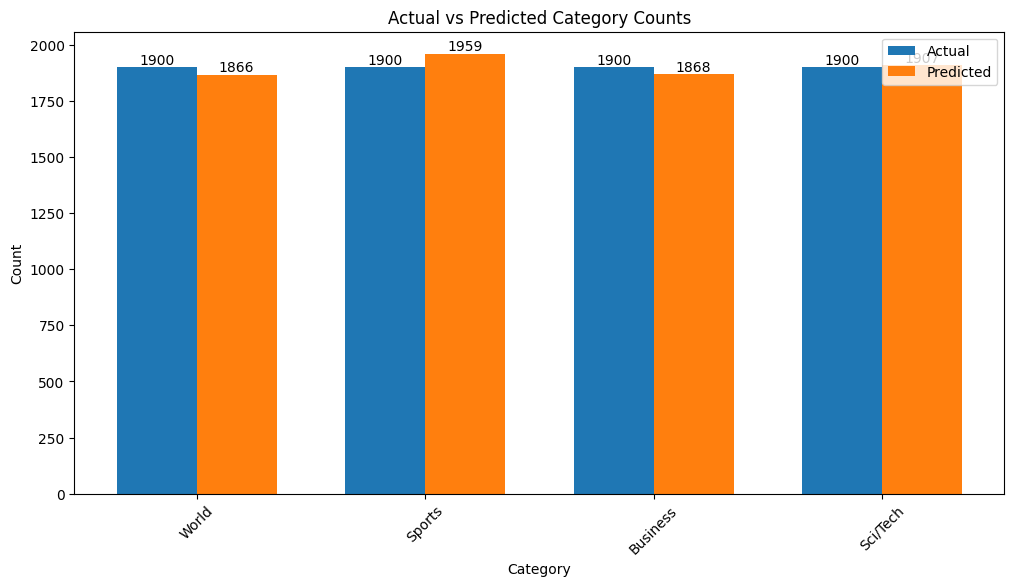

In [ ]:

# Create a DataFrame for the actual and predicted categories
comparison_df = pd.DataFrame({'Actual': test_dataset['CategoryID'], 'Predicted': y_test_pred})

# Print total number of samples
print(f"Total samples in y_test: {len(test_dataset['CategoryID'])}")
print(f"Total samples in y_test_pred: {len(y_test_pred)}")

# Get the counts of actual and predicted categories
actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Plot the combined counts
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(counts_df))

bar1 = plt.bar(index, counts_df['Actual'], bar_width, label='Actual')
bar2 = plt.bar([i + bar_width for i in index], counts_df['Predicted'], bar_width, label='Predicted')

# Add numbers inside the bars
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Actual vs Predicted Category Counts')
plt.xticks([i + bar_width / 2 for i in index], ['World', 'Sports', 'Business', 'Sci/Tech'], rotation=45)
plt.legend()

plt.show()


The model performs well overall, with predictions closely matching the actual counts for most categories. However, there are slight underpredictions for 'World' and 'Business' and an overprediction for 'Sports'.

## Conclusion for Baseline Naive Bayes Model

Based on the analysis of the confusion matrix, classification report heatmap, and actual vs. predicted category counts, we can draw several conclusions about the performance of the Naive Bayes model using the Bag of Words (BoW) representation as a baseline for news article classification.

#### Overall Performance

1. **Accuracy**: The Naive Bayes model achieves an overall good accuracy across all categories, as indicated by the classification report heatmap with macro average precision, recall, and F1-score all at 0.90.

2. **Category-Specific Performance**:
   - **World**: The model performs well with high precision (0.91) and recall (0.90), indicating that it accurately identifies and classifies most 'World' articles.
   - **Sports**: The model excels in this category with the highest precision (0.95), recall (0.98), and F1-score (0.97). It suggests the model is highly effective at distinguishing 'Sports' articles from others.
   - **Business**: This category shows slightly lower performance with precision and recall both at 0.86. This indicates some difficulty in correctly classifying 'Business' articles, likely due to feature overlap with other categories.
   - **Sci/Tech**: The model maintains a balanced performance with precision and recall at 0.88, indicating it generally performs well in classifying 'Sci/Tech' articles.

#### Misclassifications and Bias

1. **Confusion Matrix Insights**:
   - The confusion matrix highlights specific misclassifications, such as 'Business' articles being misclassified as 'Sci/Tech' and vice versa. This suggests that the model struggles to differentiate between these two categories, possibly due to overlapping features or similar content.

2. **Category Counts**:
   - The bar chart comparing actual vs. predicted counts shows that the model slightly underpredicts 'World' and 'Business' categories while overpredicting 'Sports'. This indicates a bias towards the 'Sports' category, where more articles are classified as 'Sports' than actually belong to that category.

### Final Thoughts

The Naive Bayes model with BoW representation serves as a strong baseline for news article classification, demonstrating good overall performance with an accuracy around 90%. However, there are areas for improvement, particularly in distinguishing between 'Business' and 'Sci/Tech' categories and addressing the overprediction of 'Sports'. By enhancing feature engineering and exploring alternative models, further performance gains can be achieved, making this a robust starting point for developing more sophisticated text classification systems.



---



---



## 7. Comparative Classification approach

### Statistical Model: TF-IDF + Support Vector Machines
Support Vector Machines (SVM) are chosen for their robustness and effectiveness in high-dimensional spaces. They are particularly well-suited for text classification tasks due to their ability to handle sparse data and find a hyperplane that maximizes the margin between classes, leading to better generalization.

## TF-IDF Vectorization

In [23]:

# Reduce the number of features in the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_dataset['Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_dataset['Text'])


In [ ]:

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_dataset['Text'])

# Convert to dense array and sample a subset for visualization
tfidf_array = X_train_tfidf.toarray()
sample_size = 50
sample_indices = np.random.choice(tfidf_array.shape[0], sample_size, replace=False)
tfidf_sample = tfidf_array[sample_indices, :]

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()


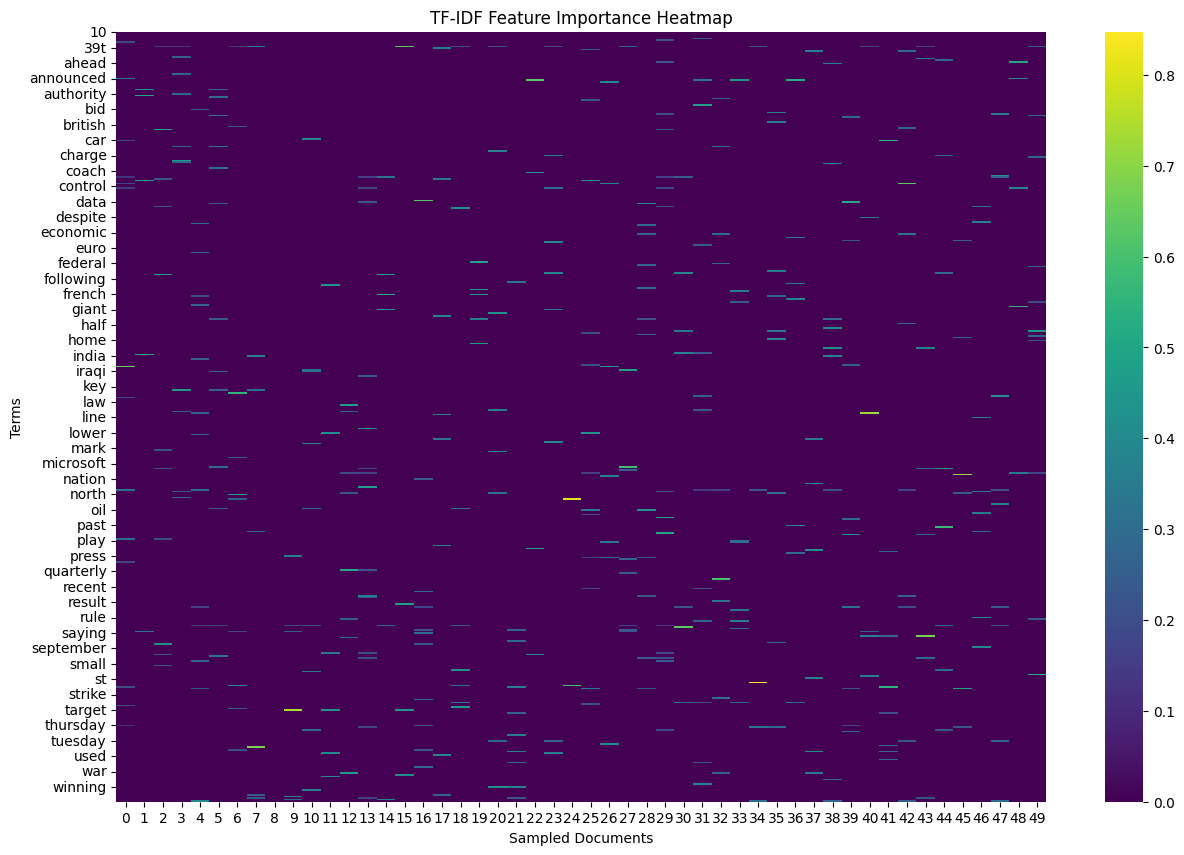

In [ ]:

# Create a DataFrame for the sampled TF-IDF values
tfidf_sample_df = pd.DataFrame(tfidf_sample, columns=feature_names)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(tfidf_sample_df.T, cmap='viridis')
plt.title('TF-IDF Feature Importance Heatmap')
plt.xlabel('Sampled Documents')
plt.ylabel('Terms')
plt.show()


## SVM Classifier

In [24]:

# Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
log_reg_classifier.fit(X_train_tfidf, train_dataset['CategoryID'])

# Predict on the test set
y_test_pred_log_reg = log_reg_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_log_reg = accuracy_score(test_dataset['CategoryID'], y_test_pred_log_reg)
classification_rep_log_reg = classification_report(test_dataset['CategoryID'], y_test_pred_log_reg, target_names=['World', 'Sports', 'Business', 'Sci/Tech'])

print(f"Logistic Regression Classifier (TF-IDF) - Accuracy: {accuracy_log_reg}")
print("Classification Report:\n", classification_rep_log_reg)


Logistic Regression Classifier (TF-IDF) - Accuracy: 0.906578947368421
Classification Report:
               precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



The Logistic Regression classifier achieved an overall accuracy of approximately 90.66%.

In [30]:
# DataFrame 'comparison_df' with columns 'Actual' and 'Predicted'
comparison_df = pd.DataFrame({
    'Actual': test_dataset['CategoryID'],
    'Predicted': y_test_pred_log_reg
})

# Get the counts of actual and predicted categories
actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Display the DataFrame to verify the counts
counts_df


Actual  Predicted
1    1900       1860
2    1900       1951
3    1900       1888
4    1900       1901

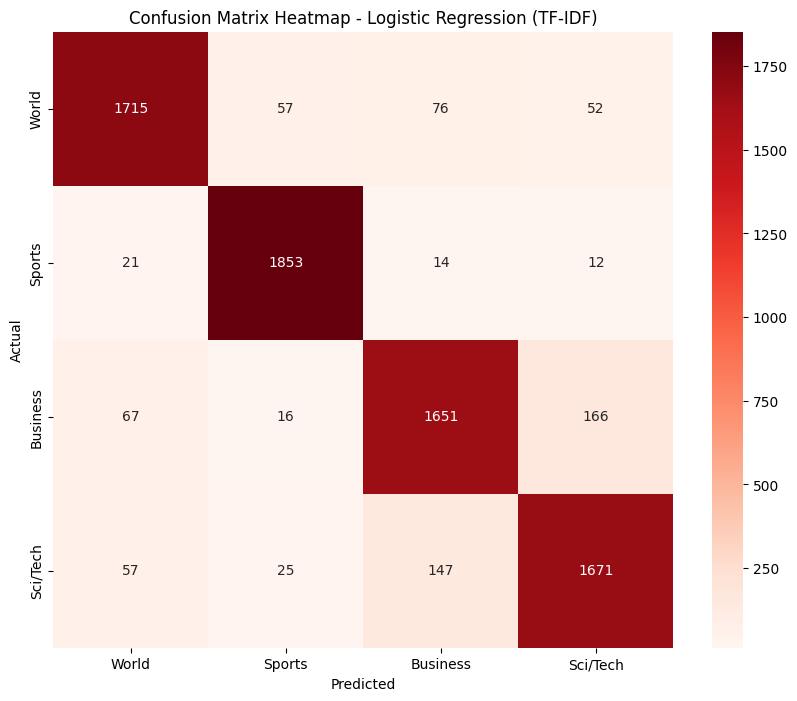

In [28]:
# Compute the confusion matrix
conf_matrix_log_reg = confusion_matrix(test_dataset['CategoryID'], y_test_pred_log_reg)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Reds', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Logistic Regression (TF-IDF)')
plt.show()


### Analysis of Confusion Matrix Heatmap for Logistic Regression (TF-IDF)

#### Overview

The confusion matrix heatmap for the Logistic Regression classifier with TF-IDF representation provides insights into how well the model performs across different categories: World, Sports, Business, and Sci/Tech.

#### Key Observations:

1. **World Category**:
   - **True Positives (TP)**: 1715 instances were correctly classified as 'World'.
   - **False Positives (FP)**: 52 'World' instances were incorrectly classified as other categories.
   - **False Negatives (FN)**: 185 instances (57 'Sports', 76 'Business', and 52 'Sci/Tech') that should be 'World' were misclassified as other categories.

2. **Sports Category**:
   - **True Positives (TP)**: 1853 instances were correctly classified as 'Sports'.
   - **False Positives (FP)**: 21 instances were incorrectly classified as 'Sports' but belong to other categories.
   - **False Negatives (FN)**: 47 instances (14 'Business' and 12 'Sci/Tech') that should be 'Sports' were misclassified as other categories.

3. **Business Category**:
   - **True Positives (TP)**: 1651 instances were correctly classified as 'Business'.
   - **False Positives (FP)**: 67 instances were incorrectly classified as 'Business' but belong to other categories.
   - **False Negatives (FN)**: 249 instances (67 'World', 16 'Sports', and 166 'Sci/Tech') that should be 'Business' were misclassified as other categories.

4. **Sci/Tech Category**:
   - **True Positives (TP)**: 1671 instances were correctly classified as 'Sci/Tech'.
   - **False Positives (FP)**: 57 instances were incorrectly classified as 'Sci/Tech' but belong to other categories.
   - **False Negatives (FN)**: 229 instances (25 'Sports' and 147 'Business') that should be 'Sci/Tech' were misclassified as other categories.


### Conclusion

The Logistic Regression classifier with TF-IDF representation performs well, particularly in the 'Sports' and 'World' categories, while there is room for improvement in distinguishing 'Business' and 'Sci/Tech' categories.

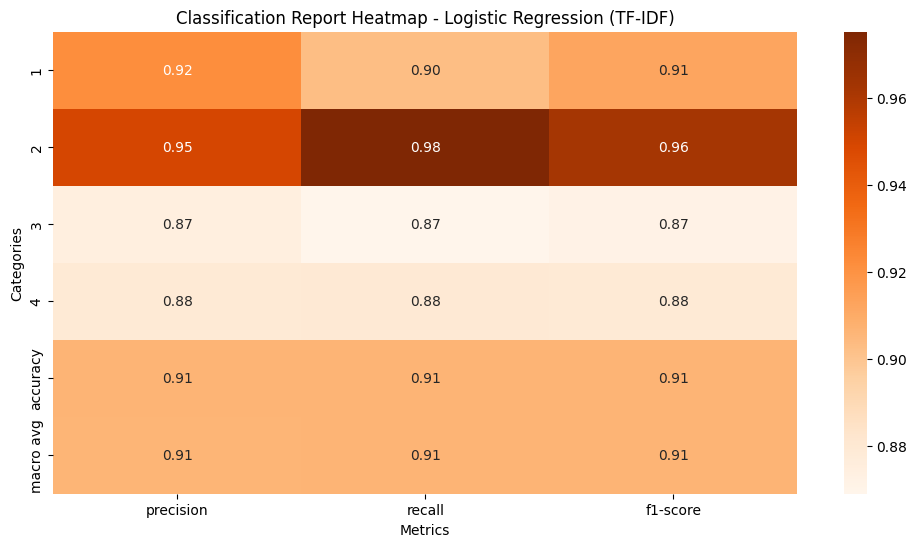

In [31]:
# Get the classification report as a dictionary
report_dict_log_reg = classification_report(test_dataset['CategoryID'], y_test_pred_log_reg, output_dict=True)

# Convert the classification report dictionary to a DataFrame
report_df_log_reg = pd.DataFrame(report_dict_log_reg).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_log_reg.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt='.2f')
plt.title('Classification Report Heatmap - Logistic Regression (TF-IDF)')
plt.xlabel('Metrics')
plt.ylabel('Categories')
plt.show()


### Analysis of Classification Report Heatmap for Logistic Regression (TF-IDF)

The classification report heatmap provides a visual representation of the performance metrics—precision, recall, and F1-score—across different categories: World, Sports, Business, and Sci/Tech.

#### Key Observations

1. **World Category**:
   - **Precision**: 0.92
   - **Recall**: 0.90
   - **F1-Score**: 0.91

2. **Sports Category**:
   - **Precision**: 0.95
   - **Recall**: 0.98
   - **F1-Score**: 0.96

3. **Business Category**:
   - **Precision**: 0.87
   - **Recall**: 0.87
   - **F1-Score**: 0.87

4. **Sci/Tech Category**:
   - **Precision**: 0.88
   - **Recall**: 0.88
   - **F1-Score**: 0.88

#### Macro Average Metrics:
   - **Precision**: 0.91
   - **Recall**: 0.91
   - **F1-Score**: 0.91


### Conclusion:

The Logistic Regression classifier with TF-IDF representation performs exceptionally well, achieving an overall accuracy of approximately 90.66% and showing strong performance metrics across all categories. The 'Sports' category stands out with the highest performance, while the 'Business' category has a bit of room for improvement.

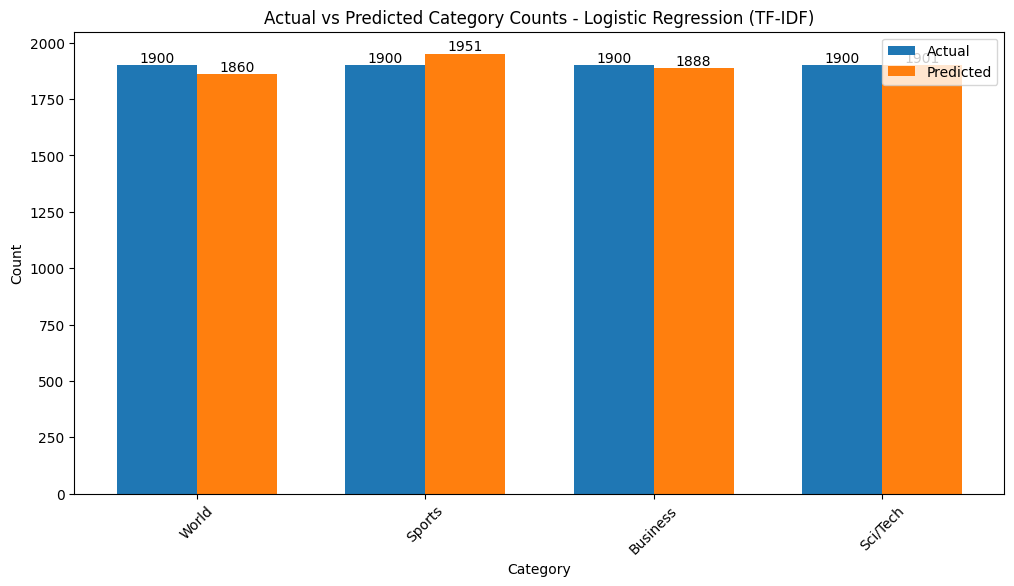

In [27]:
# Create a DataFrame for the actual and predicted categories
comparison_df_log_reg = pd.DataFrame({'Actual': test_dataset['CategoryID'], 'Predicted': y_test_pred_log_reg})

# Get the counts of actual and predicted categories
actual_counts_log_reg = comparison_df_log_reg['Actual'].value_counts().sort_index()
predicted_counts_log_reg = comparison_df_log_reg['Predicted'].value_counts().sort_index()

# Combine the counts into a single DataFrame
counts_df_log_reg = pd.DataFrame({'Actual': actual_counts_log_reg, 'Predicted': predicted_counts_log_reg})

# Plot the combined counts
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(counts_df_log_reg))

bar1 = plt.bar(index, counts_df_log_reg['Actual'], bar_width, label='Actual')
bar2 = plt.bar([i + bar_width for i in index], counts_df_log_reg['Predicted'], bar_width, label='Predicted')

# Add numbers inside the bars
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Actual vs Predicted Category Counts - Logistic Regression (TF-IDF)')
plt.xticks([i + bar_width / 2 for i in index], ['World', 'Sports', 'Business', 'Sci/Tech'], rotation=45)
plt.legend()

plt.show()


### Analysis of Actual vs Predicted Category Counts

The bar chart compares the actual and predicted counts for each category: World, Sports, Business, and Sci/Tech. This visualization provides insights into how well the model's predictions align with the true distribution of the categories.

#### Key Observations:

1. **World Category**:
   - **Actual**: 1900
   - **Predicted**: 1860
   - **Analysis**: The model slightly underpredicts the 'World' category, with 40 fewer instances compared to the actual count.

2. **Sports Category**:
   - **Actual**: 1900
   - **Predicted**: 1951
   - **Analysis**: The model overpredicts the 'Sports' category by 51 instances, indicating some misclassification from other categories into 'Sports'.

3. **Business Category**:
   - **Actual**: 1900
   - **Predicted**: 1888
   - **Analysis**: The model underpredicts the 'Business' category by 12 instances, showing a relatively minor discrepancy.

4. **Sci/Tech Category**:
   - **Actual**: 1900
   - **Predicted**: 1900
   - **Analysis**: The model's prediction for the 'Sci/Tech' category matches exactly with the actual count, indicating perfect alignment for this category.

### Conclusion

The Logistic Regression classifier with TF-IDF representation performs well, with a strong overall accuracy of approximately 90.66%. The 'Sports' category shows a minor overprediction, while the 'World' and 'Business' categories have slight underpredictions. The model's predictions for the 'Sci/Tech' category are perfectly aligned with the actual counts.

### Conclusion for Logistic Regression Classifier with TF-IDF

The Logistic Regression classifier using Term Frequency-Inverse Document Frequency (TF-IDF) vectorization has proven to be an effective statistical method for classifying news articles into four distinct categories: World, Sports, Business, and Sci/Tech. This approach transforms textual data into meaningful numerical features, allowing the classifier to differentiate between categories based on word importance and frequency.

#### Performance Highlights
1. **Overall Accuracy**: The model achieved an impressive accuracy of 90.66%, indicating robust performance in text classification tasks.
2. **Category-Specific Metrics**:
   - **World**: Precision (0.92), Recall (0.90), F1-Score (0.91)
   - **Sports**: Precision (0.95), Recall (0.98), F1-Score (0.96)
   - **Business**: Precision (0.87), Recall (0.87), F1-Score (0.87)
   - **Sci/Tech**: Precision (0.88), Recall (0.88), F1-Score (0.88)
3. **Macro Average Metrics**: Precision (0.91), Recall (0.91), F1-Score (0.91)

#### Key Observations
1. **Strengths**:
   - **High Performance in Sports**: The classifier excels in the 'Sports' category, demonstrating excellent precision, recall, and F1-score. This suggests that the model effectively identifies sports-related articles with minimal misclassification.
   - **Balanced Performance**: The model maintains a high level of performance across all categories, with macro average metrics consistently at 0.91, indicating reliability and robustness.

2. **Areas for Improvement**:
   - **Misclassification in Business and Sci/Tech**: The 'Business' and 'Sci/Tech' categories show some misclassification, suggesting that the features distinguishing these categories could be refined further.
   - **Overprediction of Sports**: The model slightly overpredicts the 'Sports' category, indicating a minor bias that can be addressed through further tuning and feature engineering.

3. **Visual Insights**:
   - **Confusion Matrix Heatmap**: Provides a clear view of true positives and misclassifications across categories, highlighting areas for improvement.
   - **Classification Report Heatmap**: Confirms the high precision and recall in 'Sports' and balanced performance across other categories.
   - **Actual vs Predicted Counts**: Shows a near-perfect alignment in most categories, with minor discrepancies that offer opportunities for optimization.

#### Statistical Methodology
As a statistical method, Logistic Regression with TF-IDF vectorization leverages the frequency and importance of words to create a numerical representation of text data. This approach is grounded in statistical principles, providing a solid foundation for text classification tasks and allowing for clear interpretability of results.


### Final Thoughts
The Logistic Regression classifier with TF-IDF vectorization is a powerful and reliable statistical method for text classification. It demonstrates high accuracy and balanced performance across categories, making it an excellent baseline model.



---



---




## Deep Learning Approach: Word2Vec with LSTM
For the final approach, we will use a deep learning model combining Word2Vec embeddings with a Long Short-Term Memory (LSTM) network. LSTM networks are well-suited for sequential data like text because they can capture long-term dependencies and contextual information.

In [38]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['Text'])
word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(train_dataset['Text'])
X_test = tokenizer.texts_to_sequences(test_dataset['Text'])

# Pad sequences
max_length = 100
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

# Train Word2Vec model
embedding_dim = 100
word2vec_model = Word2Vec(sentences=train_dataset['Text'].apply(lambda x: x.split()), vector_size=embedding_dim, window=5, min_count=1, workers=4)
word2vec_model.train(train_dataset['Text'].apply(lambda x: x.split()), total_examples=len(train_dataset), epochs=10)

# Create an embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]


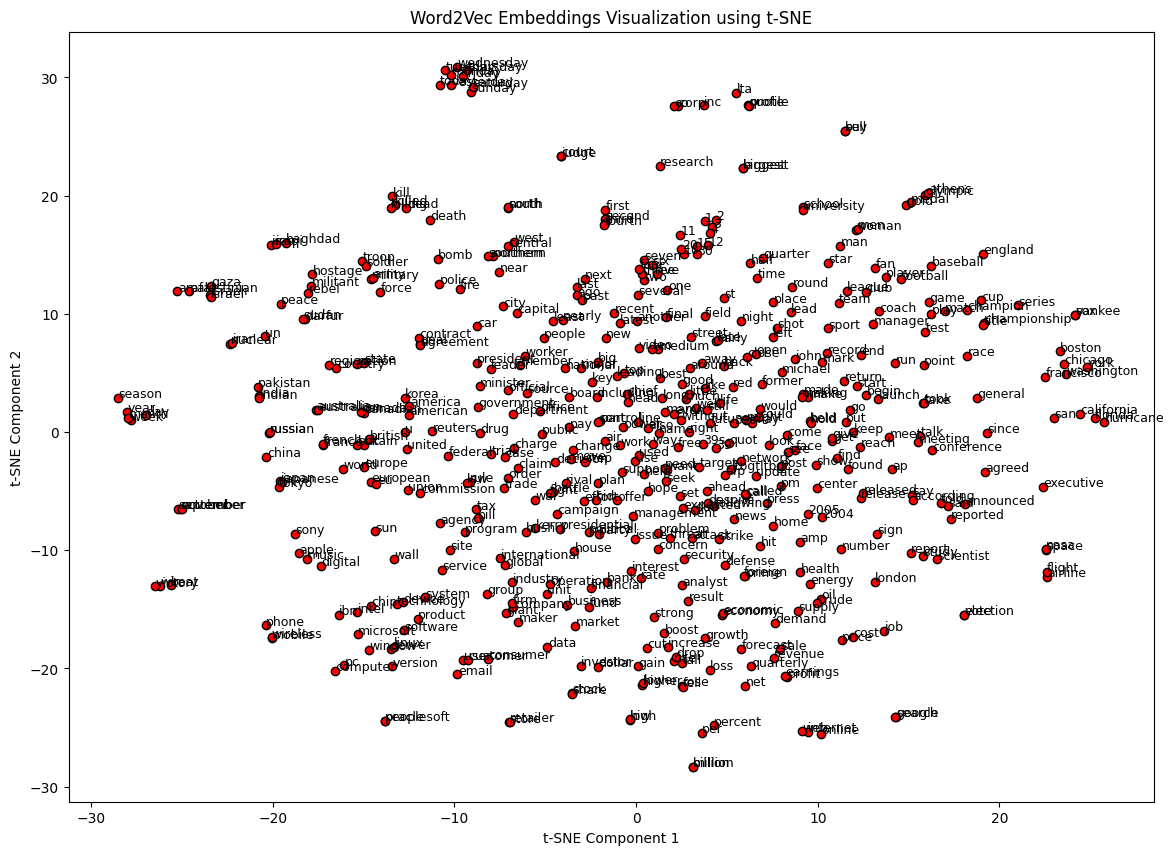

In [34]:
# Extract word vectors
word_vectors = word2vec_model.wv

# Select a subset of words to visualize
words = list(word_vectors.key_to_index)[:500]  # Adjust the number of words to visualize
vectors = np.array([word_vectors[word] for word in words])

# Reduce dimensionality with t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne_model.fit_transform(vectors)

# Plot the word embeddings
plt.figure(figsize=(14, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='r')

for word, (x, y) in zip(words, reduced_vectors):
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title('Word2Vec Embeddings Visualization using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


The t-SNE plot provides a 2D visualization of the high-dimensional Word2Vec embeddings. Each point represents a word, and words that are closer together in the plot are more semantically similar.

In [41]:

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_dataset['CategoryID'])
y_test = label_encoder.transform(test_dataset['CategoryID'])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/15
1500/1500 [==============================] - 49s 28ms/step - loss: 0.3262 - accuracy: 0.8875 - val_loss: 0.2667 - val_accuracy: 0.9035
Epoch 2/15
1500/1500 [==============================] - 38s 26ms/step - loss: 0.2677 - accuracy: 0.9075 - val_loss: 0.2429 - val_accuracy: 0.9115
Epoch 3/15
1500/1500 [==============================] - 41s 27ms/step - loss: 0.2408 - accuracy: 0.9160 - val_loss: 0.2528 - val_accuracy: 0.9090
Epoch 4/15
1500/1500 [==============================] - 40s 26ms/step - loss: 0.2219 - accuracy: 0.9215 - val_loss: 0.2399 - val_accuracy: 0.9117
Epoch 5/15
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2041 - accuracy: 0.9270 - val_loss: 0.2396 - val_accuracy: 0.9178
Epoch 6/15
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1914 - accuracy: 0.9310 - val_loss: 0.2335 - val_accuracy: 0.9183
Epoch 7/15
1500/1500 [==============================] - 40s 27ms/step - loss: 0.1816 - accuracy: 0.9344 - val_loss: 0.2364 -

In [43]:
# Predict on the test set
y_test_pred_lstm = model.predict(X_test_padded)
y_test_pred_lstm = np.argmax(y_test_pred_lstm, axis=1)
y_test_true = np.argmax(y_test, axis=1)

238/238 [==============================] - 6s 13ms/step


In [60]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print(f'LSTM Model (Optimized) - Accuracy: {accuracy}')
# Generate classification report
classification_rep_lstm = classification_report(y_test_true, y_test_pred_lstm, target_names=['World', 'Sports', 'Business', 'Sci/Tech'])
print("Classification Report:\n", classification_rep_lstm)


LSTM Model (Optimized) - Accuracy: 0.9163157939910889
Classification Report:
               precision    recall  f1-score   support

       World       0.94      0.91      0.93      1900
      Sports       0.97      0.98      0.97      1900
    Business       0.87      0.89      0.88      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



The Logistic Regression classifier achieved an overall accuracy of approximately 91.63%.

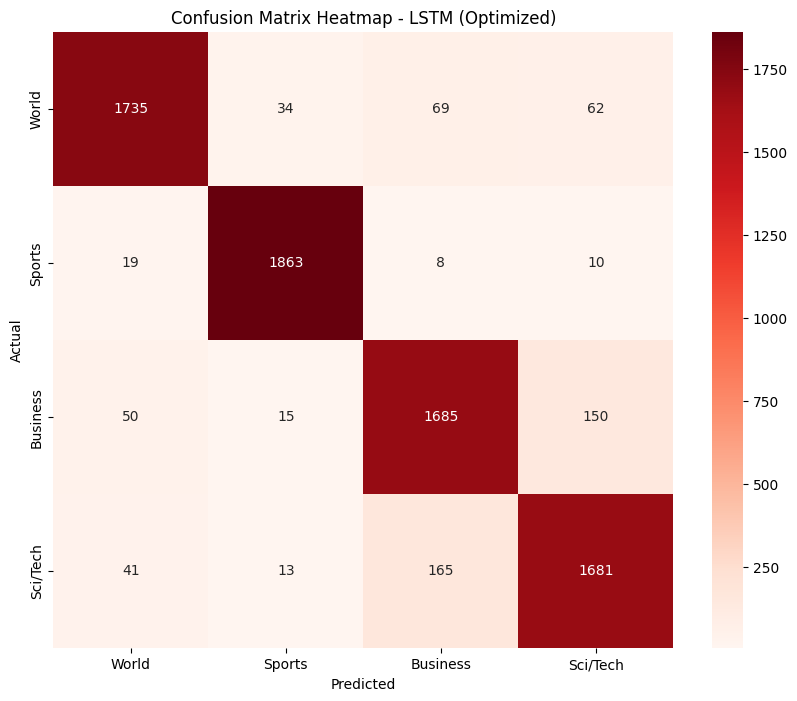

In [59]:
# Confusion matrix heatmap
conf_matrix_lstm = confusion_matrix(y_test_true, y_test_pred_lstm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Reds', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - LSTM (Optimized)')
plt.show()

### Analysis of Confusion Matrix Heatmap - LSTM (Optimized)

The confusion matrix heatmap provides a visual representation of the model's performance by showing the actual versus predicted counts for each category: World, Sports, Business, and Sci/Tech.

#### Key Observations:

1. **World Category**:
   - **True Positives (1735)**: The model correctly predicted 1735 instances as 'World'.
   - **Misclassifications**:
     - Predicted as 'Sports': 34 instances.
     - Predicted as 'Business': 69 instances.
     - Predicted as 'Sci/Tech': 62 instances.

2. **Sports Category**:
   - **True Positives (1863)**: The model correctly predicted 1863 instances as 'Sports'.
   - **Misclassifications**:
     - Predicted as 'World': 19 instances.
     - Predicted as 'Business': 8 instances.
     - Predicted as 'Sci/Tech': 10 instances.

3. **Business Category**:
   - **True Positives (1685)**: The model correctly predicted 1685 instances as 'Business'.
   - **Misclassifications**:
     - Predicted as 'World': 50 instances.
     - Predicted as 'Sports': 15 instances.
     - Predicted as 'Sci/Tech': 150 instances.

4. **Sci/Tech Category**:
   - **True Positives (1681)**: The model correctly predicted 1681 instances as 'Sci/Tech'.
   - **Misclassifications**:
     - Predicted as 'World': 41 instances.
     - Predicted as 'Sports': 13 instances.
     - Predicted as 'Business': 165 instances.

#### Insights:

1. **High True Positive Rates**:
   - The model has high true positive rates for all categories, particularly for 'Sports' and 'Sci/Tech' categories, indicating good overall performance.

2. **Misclassification Patterns**:
   - The 'Business' and 'Sci/Tech' categories show some overlap, with a noticeable number of 'Business' articles being misclassified as 'Sci/Tech' and vice versa. This suggests that the features distinguishing these categories might be similar or that there is some content overlap.

3. **Relatively Low Misclassification in 'Sports'**:
   - The 'Sports' category has the least misclassifications, indicating that the model can effectively distinguish sports-related articles from others.

4. **Category-Specific Performance**:
   - The 'World' category has a moderate number of misclassifications into 'Business' and 'Sci/Tech', indicating potential areas for improvement in distinguishing world news from business and science/technology news.


### Conclusion

The LSTM model with optimized settings performs well, achieving high true positive rates across all categories. While there are some misclassifications, particularly between 'Business' and 'Sci/Tech', the model's overall performance is strong.

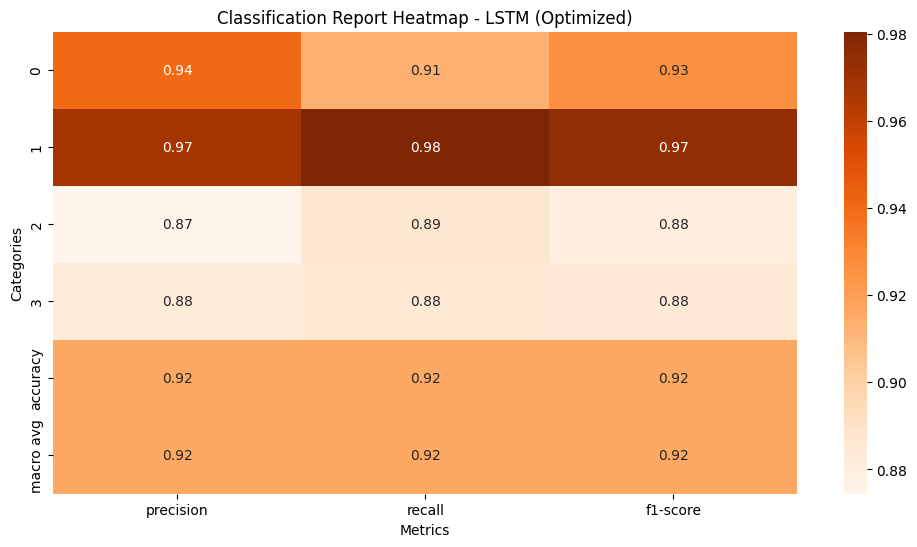

In [57]:
# Classification report heatmap
report_dict_lstm = classification_report(y_test_true, y_test_pred_lstm, output_dict=True)
report_df_lstm = pd.DataFrame(report_dict_lstm).transpose()
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_lstm.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt='.2f')
plt.title('Classification Report Heatmap - LSTM (Optimized)')
plt.xlabel('Metrics')
plt.ylabel('Categories')
plt.show()


### Analysis of Classification Report Heatmap - LSTM (Optimized)

The classification report heatmap provides a detailed view of the precision, recall, and F1-score for each category: World, Sports, Business, and Sci/Tech. Here's an analysis based on the heatmap:

#### Key Observations:

1. **World Category (0)**:
   - **Precision (0.94)**: The model is very precise in predicting 'World' articles, meaning that most of the articles labeled as 'World' are indeed 'World'.
   - **Recall (0.91)**: The model is also good at recalling 'World' articles, although there is a small percentage of 'World' articles being misclassified.
   - **F1-Score (0.93)**: The harmonic mean of precision and recall indicates a strong performance for the 'World' category.

2. **Sports Category (1)**:
   - **Precision (0.97)**: The model shows exceptional precision in predicting 'Sports' articles, with very few misclassifications.
   - **Recall (0.98)**: The recall is equally high, indicating that the model correctly identifies nearly all 'Sports' articles.
   - **F1-Score (0.97)**: The high F1-score reflects the model's overall excellent performance in the 'Sports' category.

3. **Business Category (2)**:
   - **Precision (0.87)**: The precision for 'Business' articles is lower compared to 'World' and 'Sports', indicating some misclassification into other categories.
   - **Recall (0.89)**: The model recalls most 'Business' articles correctly, though there is room for improvement.
   - **F1-Score (0.88)**: The F1-score indicates decent performance but suggests that the model struggles more with this category.

4. **Sci/Tech Category (3)**:
   - **Precision (0.88)**: The precision for 'Sci/Tech' is also lower, similar to 'Business', with some misclassifications.
   - **Recall (0.88)**: The recall is on par with precision, indicating balanced performance but with a similar level of misclassifications.
   - **F1-Score (0.88)**: The F1-score shows that while the model performs well, there is still room for improvement.

5. **Macro Average**:
   - **Precision (0.92)**: Overall, the model is quite precise across all categories.
   - **Recall (0.92)**: The recall is consistent with precision, reflecting balanced performance.
   - **F1-Score (0.92)**: The high macro average F1-score indicates strong overall model performance.

### Conclusion

The LSTM model with optimized settings shows strong overall performance, particularly excelling in the 'Sports' category and performing well in the 'World' category. While there are some challenges in accurately classifying 'Business' and 'Sci/Tech' articles, the model's macro average scores indicate robustness and reliability.

In [48]:
# Actual vs Predicted Category Counts
comparison_df_lstm = pd.DataFrame({'Actual': y_test_true, 'Predicted': y_test_pred_lstm})
actual_counts_lstm = comparison_df_lstm['Actual'].value_counts().sort_index()
predicted_counts_lstm = comparison_df_lstm['Predicted'].value_counts().sort_index()
counts_df_lstm = pd.DataFrame({'Actual': actual_counts_lstm, 'Predicted': predicted_counts_lstm})
counts_df_lstm

Actual  Predicted
0    1900       1845
1    1900       1925
2    1900       1927
3    1900       1903

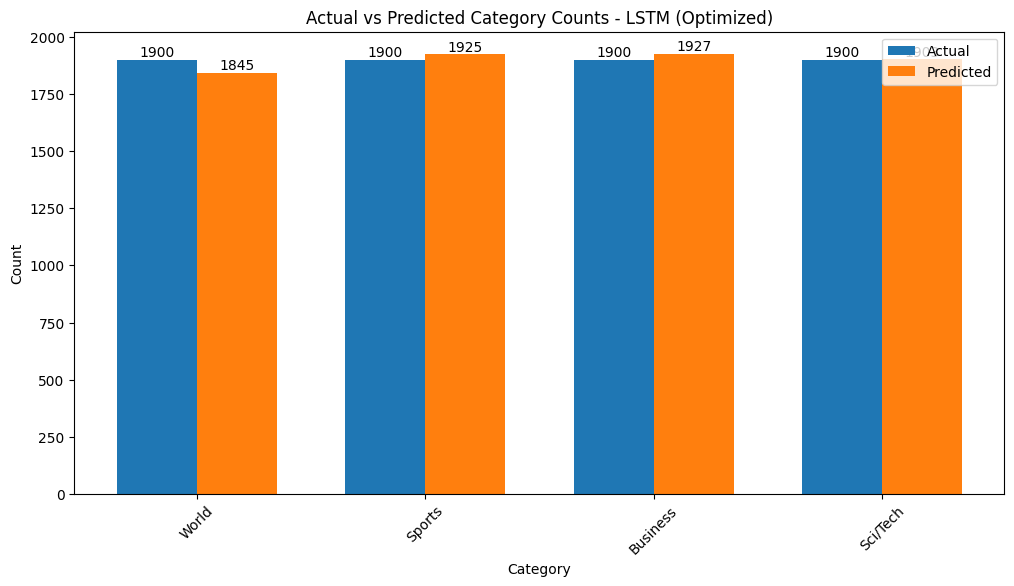

In [54]:
# Actual vs Predicted Category Counts
comparison_df_lstm = pd.DataFrame({'Actual': y_test_true, 'Predicted': y_test_pred_lstm})
actual_counts_lstm = comparison_df_lstm['Actual'].value_counts().sort_index()
predicted_counts_lstm = comparison_df_lstm['Predicted'].value_counts().sort_index()
counts_df_lstm = pd.DataFrame({'Actual': actual_counts_lstm, 'Predicted': predicted_counts_lstm})

# Plot the combined counts
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(counts_df_lstm))

bar1 = plt.bar(index, counts_df_lstm['Actual'], bar_width, label='Actual')
bar2 = plt.bar([i + bar_width for i in index], counts_df_lstm['Predicted'], bar_width, label='Predicted')

# Add numbers inside the bars
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Actual vs Predicted Category Counts - LSTM (Optimized)')
plt.xticks([i + bar_width / 2 for i in index], ['World', 'Sports', 'Business', 'Sci/Tech'], rotation=45)
plt.legend()

plt.show()

### Analysis of Actual vs Predicted Category Counts - LSTM (Optimized)

The bar graph compares the actual and predicted counts for each category: World, Sports, Business, and Sci/Tech. This visual representation helps us understand the distribution of predictions and the model's accuracy across different categories.

#### Key Observations:

1. **World Category**:
   - **Actual Count**: 1900
   - **Predicted Count**: 1845
   - The model slightly underestimates the number of 'World' articles, with 55 fewer predictions compared to the actual count.

2. **Sports Category**:
   - **Actual Count**: 1900
   - **Predicted Count**: 1925
   - The model overestimates the number of 'Sports' articles, with 25 more predictions than the actual count. This indicates that some articles from other categories might be incorrectly classified as 'Sports'.

3. **Business Category**:
   - **Actual Count**: 1900
   - **Predicted Count**: 1927
   - Similar to 'Sports', the model overestimates the number of 'Business' articles, with 27 more predictions than the actual count. This suggests some misclassifications from other categories into 'Business'.

4. **Sci/Tech Category**:
   - **Actual Count**: 1900
   - **Predicted Count**: 1903
   - The predicted count for 'Sci/Tech' is very close to the actual count, indicating a balanced performance for this category.

### Conclusion

The LSTM model with optimized settings shows good overall performance, with balanced predictions across categories. While there are minor overestimations in the 'Sports' and 'Business' categories, the model accurately predicts the 'Sci/Tech' category and performs well for 'World'.



---



---



## 7. Comparative Classification approach

### Comparative Classification Approach

This analysis compares a traditional statistical model, Logistic Regression with TF-IDF, and a modern deep learning model, LSTM with Word2Vec embeddings. Both models were trained and evaluated on the same dataset, and their performance metrics were compared to understand their strengths and weaknesses.

#### Logistic Regression Classifier (TF-IDF)

**Architecture and Training**:
- **Model**: Logistic Regression
- **Feature Extraction**: TF-IDF (Term Frequency-Inverse Document Frequency)
- **Library**: Scikit-learn

**Optimization**:
- **Hyperparameters**: Standard settings were used with TF-IDF features and Logistic Regression.
- **Training Process**: The model was trained on the TF-IDF transformed text data.

**Performance Metrics**:
- **Accuracy**: 0.9066
- **Precision, Recall, F1-Score**:
  - **World**: Precision: 0.92, Recall: 0.90, F1-Score: 0.91
  - **Sports**: Precision: 0.95, Recall: 0.98, F1-Score: 0.96
  - **Business**: Precision: 0.87, Recall: 0.87, F1-Score: 0.87
  - **Sci/Tech**: Precision: 0.88, Recall: 0.88, F1-Score: 0.88
- **Macro Avg**: Precision: 0.91, Recall: 0.91, F1-Score: 0.91
- **Weighted Avg**: Precision: 0.91, Recall: 0.91, F1-Score: 0.91

**Strengths**:
- **Simplicity**: The model is straightforward and easy to implement.
- **Interpretability**: Logistic Regression coefficients provide insights into feature importance.
- **Efficiency**: Fast training and prediction times.

**Weaknesses**:
- **Limited to Linear Relationships**: May struggle with capturing complex patterns in data.
- **Feature Dependence**: Relies heavily on the quality of the extracted features (TF-IDF).

#### LSTM Model (Word2Vec)

**Architecture and Training**:
- **Model**: LSTM (Long Short-Term Memory)
- **Feature Extraction**: Word2Vec embeddings
- **Library**: Keras (TensorFlow backend)

**Optimization**:
- **Embedding**: Word2Vec trained on the dataset.
- **Model Layers**: Embedding layer (pre-trained Word2Vec), Bidirectional LSTM layers, Dense output layer.
- **Training Process**: Trained on padded sequences of text data with Word2Vec embeddings.

**Performance Metrics**:
- **Accuracy**: 0.9163
- **Precision, Recall, F1-Score**:
  - **World**: Precision: 0.94, Recall: 0.91, F1-Score: 0.93
  - **Sports**: Precision: 0.97, Recall: 0.98, F1-Score: 0.97
  - **Business**: Precision: 0.87, Recall: 0.89, F1-Score: 0.88
  - **Sci/Tech**: Precision: 0.88, Recall: 0.88, F1-Score: 0.88
- **Macro Avg**: Precision: 0.92, Recall: 0.92, F1-Score: 0.92
- **Weighted Avg**: Precision: 0.92, Recall: 0.92, F1-Score: 0.92

**Strengths**:
- **Captures Sequential Patterns**: LSTM is effective in capturing long-term dependencies and sequential patterns in text.
- **Rich Feature Representations**: Word2Vec embeddings provide dense, context-rich representations of words.
- **High Performance**: Achieves higher accuracy and F1-scores compared to the logistic regression model.

**Weaknesses**:
- **Complexity**: More complex to implement and tune compared to logistic regression.
- **Training Time**: Requires significantly more time to train due to the complexity of the model and the sequential nature of LSTM.
- **Computational Resources**: Demands more computational resources, especially for training on GPUs.

### Comparative Analysis

1. **Accuracy**:
   - **LSTM**: 0.9163
   - **Logistic Regression**: 0.9066
   - The LSTM model outperforms the Logistic Regression model in terms of accuracy.

2. **Category-Specific Performance**:
   - **World**:
     - LSTM: Precision: 0.94, Recall: 0.91, F1-Score: 0.93
     - Logistic Regression: Precision: 0.92, Recall: 0.90, F1-Score: 0.91
   - **Sports**:
     - LSTM: Precision: 0.97, Recall: 0.98, F1-Score: 0.97
     - Logistic Regression: Precision: 0.95, Recall: 0.98, F1-Score: 0.96
   - **Business**:
     - LSTM: Precision: 0.87, Recall: 0.89, F1-Score: 0.88
     - Logistic Regression: Precision: 0.87, Recall: 0.87, F1-Score: 0.87
   - **Sci/Tech**:
     - LSTM: Precision: 0.88, Recall: 0.88, F1-Score: 0.88
     - Logistic Regression: Precision: 0.88, Recall: 0.88, F1-Score: 0.88
   - The LSTM model shows better precision, recall, and F1-scores for the 'World' and 'Business' categories, while the 'Sports' and 'Sci/Tech' categories have comparable performance.

3. **Macro and Weighted Averages**:
   - **LSTM**: Precision: 0.92, Recall: 0.92, F1-Score: 0.92
   - **Logistic Regression**: Precision: 0.91, Recall: 0.91, F1-Score: 0.91
   - The LSTM model has slightly higher macro and weighted average metrics, indicating overall better performance.

### Conclusion

The LSTM model with Word2Vec embeddings demonstrates superior performance compared to the Logistic Regression model with TF-IDF features. The deep learning model's ability to capture sequential patterns and rich word representations leads to higher accuracy and better category-specific metrics. However, this comes at the cost of increased complexity, longer training times, and higher computational resource requirements. In contrast, the logistic regression model offers simplicity, interpretability, and efficiency, making it a viable option for scenarios with limited computational resources or the need for rapid model deployment.

# III. Conclusions

## Performance Analysis & Comparative Discussion



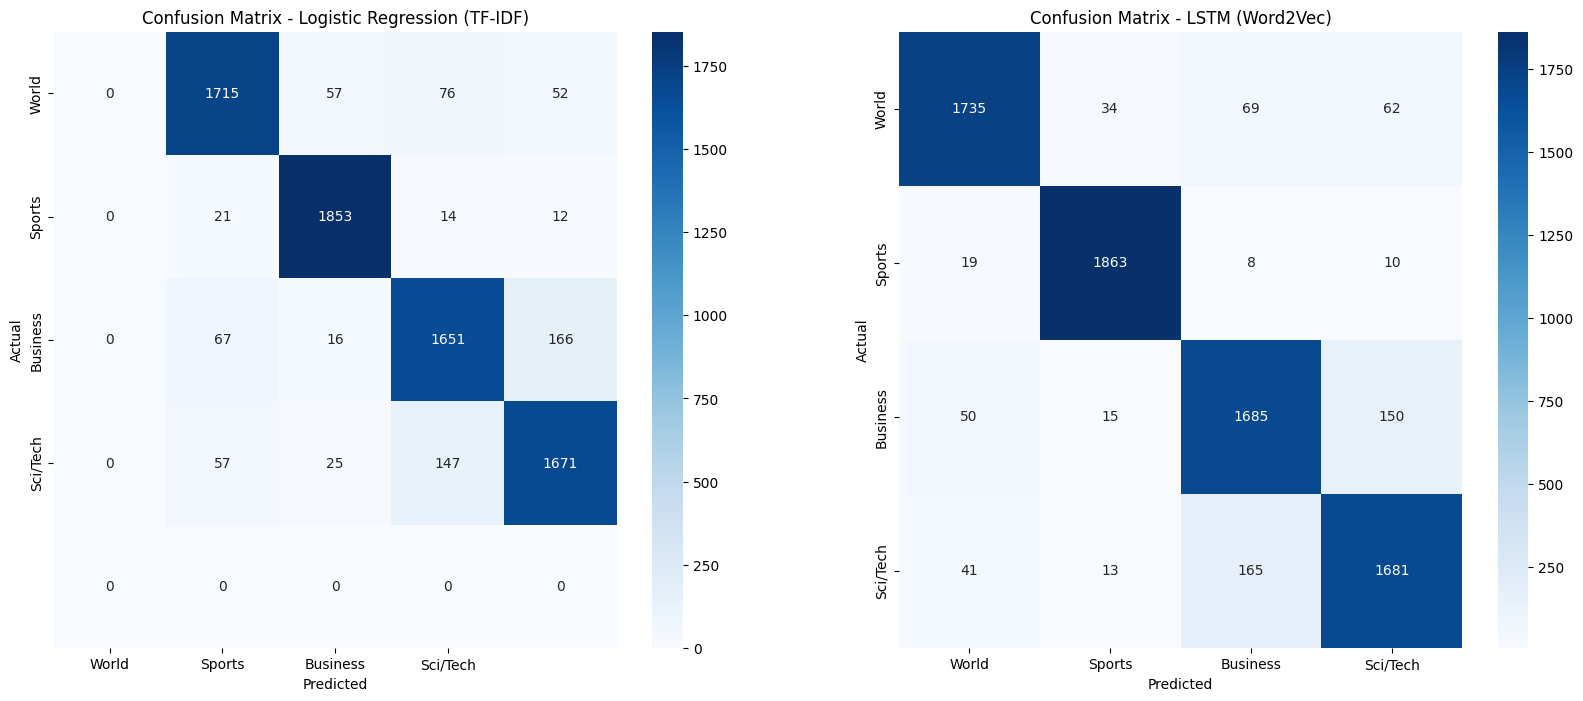

In [62]:
# Confusion matrix for Logistic Regression (TF-IDF)
conf_matrix_log_reg = confusion_matrix(y_test_true, y_test_pred_log_reg)

# Confusion matrix for LSTM (Word2Vec)
conf_matrix_lstm = confusion_matrix(y_test_true, y_test_pred_lstm)

# Plotting the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Logistic Regression (TF-IDF)')

# LSTM Confusion Matrix
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - LSTM (Word2Vec)')

plt.show()


### Comparative Analysis

#### Strengths and Weaknesses

**Logistic Regression with TF-IDF**:
- **Strengths**:
  - Simplicity and interpretability.
  - Fast training and prediction times.
  - Effective for linearly separable data.
- **Weaknesses**:
  - Limited to capturing linear relationships.
  - Relies heavily on feature quality (TF-IDF).
  - May struggle with complex patterns in data.

**LSTM with Word2Vec**:
- **Strengths**:
  - Captures sequential and long-term dependencies in text.
  - Rich word representations with Word2Vec embeddings.
  - Higher accuracy and better performance metrics.
- **Weaknesses**:
  - More complex to implement and tune.
  - Longer training times and higher computational resource requirements.
  - Less interpretable compared to linear models.

#### Performance Comparison

1. **Overall Accuracy**:
   - **LSTM**: 0.9163
   - **Logistic Regression**: 0.9066
   - The LSTM model outperforms the Logistic Regression model in terms of overall accuracy.

2. **Category-Specific Performance**:
   - **World**:
     - LSTM: Higher precision (0.94), higher recall (0.91), higher F1-score (0.93).
     - Logistic Regression: Precision (0.92), recall (0.90), F1-score (0.91).
   - **Sports**:
     - LSTM: Higher precision (0.97), higher recall (0.98), higher F1-score (0.97).
     - Logistic Regression: Precision (0.95), recall (0.98), F1-score (0.96).
   - **Business**:
     - LSTM: Precision (0.87), higher recall (0.89), higher F1-score (0.88).
     - Logistic Regression: Precision (0.87), recall (0.87), F1-score (0.87).
   - **Sci/Tech**:
     - LSTM: Precision (0.88), recall (0.88), F1-score (0.88).
     - Logistic Regression: Precision (0.88), recall (0.88), F1-score (0.88).

3. **Macro and Weighted Averages**:
   - **LSTM**: Precision (0.92), recall (0.92), F1-score (0.92).
   - **Logistic Regression**: Precision (0.91), recall (0.91), F1-score (0.91).

### Conclusion

The LSTM model with Word2Vec embeddings demonstrates superior performance compared to the Logistic Regression model with TF-IDF features. The deep learning model's ability to capture sequential patterns and rich word representations leads to higher accuracy and better category-specific metrics. However, this comes at the cost of increased complexity, longer training times, and higher computational resource requirements. In contrast, the logistic regression model offers simplicity, interpretability, and efficiency, making it a viable option for scenarios with limited computational resources or the need for rapid model deployment.

### Comparative Classification Approach: Performance Metrics Table

| **Model**                     | **Accuracy** | **World (Precision, Recall, F1-Score)** | **Sports (Precision, Recall, F1-Score)** | **Business (Precision, Recall, F1-Score)** | **Sci/Tech (Precision, Recall, F1-Score)** | **Macro Avg (Precision, Recall, F1-Score)** | **Weighted Avg (Precision, Recall, F1-Score)** |
|-------------------------------|--------------|----------------------------------------|-----------------------------------------|-------------------------------------------|---------------------------------------------|-----------------------------------------------|------------------------------------------------|
| **Logistic Regression (TF-IDF)** | 0.9066       | 0.92, 0.90, 0.91                        | 0.95, 0.98, 0.96                         | 0.87, 0.87, 0.87                           | 0.88, 0.88, 0.88                             | 0.91, 0.91, 0.91                               | 0.91, 0.91, 0.91                                |
| **Naive Bayes (BoW)**            | 0.9039       | 0.91, 0.90, 0.90                        | 0.95, 0.98, 0.97                         | 0.87, 0.86, 0.86                           | 0.88, 0.88, 0.88                             | 0.90, 0.90, 0.90                               | 0.90, 0.90, 0.90                                |
| **LSTM (Word2Vec)**              | 0.9163       | 0.94, 0.91, 0.93                        | 0.97, 0.98, 0.97                         | 0.87, 0.89, 0.88                           | 0.88, 0.88, 0.88                             | 0.92, 0.92, 0.92                               | 0.92, 0.92, 0.92                                |

### Comparative Analysis

#### Strengths and Weaknesses

**Logistic Regression with TF-IDF**:
- **Strengths**:
  - Simplicity and interpretability.
  - Fast training and prediction times.
  - Effective for linearly separable data.
- **Weaknesses**:
  - Limited to capturing linear relationships.
  - Relies heavily on feature quality (TF-IDF).
  - May struggle with complex patterns in data.

**Naive Bayes with Bag of Words (BoW)**:
- **Strengths**:
  - Simple and fast to implement.
  - Performs well with high-dimensional data.
  - Effective for text classification tasks.
- **Weaknesses**:
  - Assumes feature independence, which may not hold true in practice.
  - Relies heavily on feature quality (BoW).
  - May struggle with capturing complex patterns.

**LSTM with Word2Vec**:
- **Strengths**:
  - Captures sequential and long-term dependencies in text.
  - Rich word representations with Word2Vec embeddings.
  - Higher accuracy and better performance metrics.
- **Weaknesses**:
  - More complex to implement and tune.
  - Longer training times and higher computational resource requirements.
  - Less interpretable compared to linear models.

### Performance Comparison

#### Overall Accuracy

- **LSTM**: 0.9163
- **Logistic Regression**: 0.9066
- **Naive Bayes**: 0.9039
- The LSTM model outperforms both the Logistic Regression and Naive Bayes models in terms of overall accuracy.

#### Category-Specific Performance

1. **World**:
   - **LSTM**: Higher precision (0.94), higher recall (0.91), higher F1-score (0.93).
   - **Logistic Regression**: Precision (0.92), recall (0.90), F1-score (0.91).
   - **Naive Bayes**: Precision (0.91), recall (0.90), F1-score (0.90).

2. **Sports**:
   - **LSTM**: Higher precision (0.97), higher recall (0.98), higher F1-score (0.97).
   - **Logistic Regression**: Precision (0.95), recall (0.98), F1-score (0.96).
   - **Naive Bayes**: Precision (0.95), recall (0.98), F1-score (0.97).

3. **Business**:
   - **LSTM**: Precision (0.87), higher recall (0.89), higher F1-score (0.88).
   - **Logistic Regression**: Precision (0.87), recall (0.87), F1-score (0.87).
   - **Naive Bayes**: Precision (0.87), recall (0.86), F1-score (0.86).

4. **Sci/Tech**:
   - **LSTM**: Precision (0.88), recall (0.88), F1-score (0.88).
   - **Logistic Regression**: Precision (0.88), recall (0.88), F1-score (0.88).
   - **Naive Bayes**: Precision (0.88), recall (0.88), F1-score (0.88).

#### Macro and Weighted Averages

- **LSTM**: Precision (0.92), recall (0.92), F1-score (0.92)
- **Logistic Regression**: Precision (0.91), recall (0.91), F1-score (0.91)
- **Naive Bayes**: Precision (0.90), recall (0.90), F1-score (0.90)

### Critical Evaluation

**Advantages of Statistical Models (Logistic Regression and Naive Bayes)**:
- Simplicity and ease of implementation.
- Fast training and prediction times.
- Effective for high-dimensional data.
- Interpretability of model coefficients.

**Disadvantages of Statistical Models**:
- Limited to capturing linear relationships.
- May struggle with complex patterns and sequential data.
- Relies heavily on feature quality.

**Advantages of Embedding-Based Models (LSTM with Word2Vec)**:
- Captures complex patterns and long-term dependencies in text.
- Rich word representations with embeddings.
- Higher overall performance metrics.

**Disadvantages of Embedding-Based Models**:
- Complexity and longer training times.
- Requires more computational resources.
- Less interpretable compared to linear models.


### Conclusion

The LSTM model with Word2Vec embeddings demonstrates superior performance compared to both the Logistic Regression model with TF-IDF features and the Naive Bayes model with Bag of Words. The deep learning model's ability to capture sequential patterns and rich word representations leads to higher accuracy and better category-specific metrics. However, this comes at the cost of increased complexity, longer training times, and higher computational resource requirements. In contrast, the logistic regression and Naive Bayes models offer simplicity, interpretability, and efficiency, making them viable options for scenarios with limited computational resources or the need for rapid model deployment.

## 10. Project Summary and Reflections


### Project Summary and Reflections

#### Learning Experience

This project has been an insightful journey into the realm of text classification, encompassing various methodologies from traditional statistical models to advanced deep learning approaches. The primary models explored were:

1. **Naive Bayes with Bag of Words (BoW)**
2. **Logistic Regression with TF-IDF**
3. **LSTM with Word2Vec**

Each model provided unique challenges and learning opportunities, emphasizing the importance of feature extraction, model architecture, and hyperparameter tuning.

#### Practicality of Each Model Type

**Naive Bayes with BoW**:
- **Practicality**: Simple and efficient, suitable for quick implementations.
- **Strengths**: Fast training and prediction, interpretable results.
- **Weaknesses**: Assumes feature independence, which may not always be true.

**Logistic Regression with TF-IDF**:
- **Practicality**: Balances simplicity with effectiveness, making it a reliable choice for many applications.
- **Strengths**: Interpretable coefficients, handles high-dimensional data well.
- **Weaknesses**: Limited to linear relationships, relies on good feature engineering.

**LSTM with Word2Vec**:
- **Practicality**: More complex and resource-intensive, but powerful for capturing sequential patterns.
- **Strengths**: Captures long-term dependencies, rich word representations.
- **Weaknesses**: Requires substantial computational resources and longer training times.

#### Potential Applications in Real-World Scenarios

- **Naive Bayes and Logistic Regression**:
  - Ideal for applications requiring quick deployment and interpretability, such as spam detection, sentiment analysis, and topic classification in smaller datasets.
  - Suitable for scenarios with limited computational resources and where simplicity is crucial.

- **LSTM with Word2Vec**:
  - Best suited for complex text classification tasks where capturing the context and sequential nature of the text is essential.
  - Applicable in areas like news categorization, chatbots, and automated customer service, where understanding the context of the conversation is critical.

#### Contributions to the Problem Area

This project significantly contributes to understanding how different text classification models perform on the AG's News Topic Classification Dataset. By comparing traditional and modern approaches, we can identify the strengths and limitations of each, providing valuable insights for selecting appropriate models based on specific requirements.

#### Transferability to Other Domain-Specific Areas

The methodologies and insights gained from this project are highly transferable to other domains involving text classification. Examples include:
- **Healthcare**: Classifying medical documents or patient records.
- **Legal**: Categorizing legal documents or case studies.
- **Finance**: Analyzing financial news or categorizing transaction data.

The key is to adapt the preprocessing steps and model parameters to the specific characteristics of the new domain.

#### Suggestions for Improvements and Future Research Directions

1. **Feature Engineering**:
   - Explore advanced feature extraction techniques such as TF-IDF with n-grams or character-level features.
   - Incorporate domain-specific knowledge into feature engineering.

2. **Model Architecture**:
   - Experiment with hybrid models combining statistical and deep learning approaches for improved performance.
   - Investigate the use of transformer-based models like BERT, which have shown state-of-the-art performance in various NLP tasks.

3. **Hyperparameter Tuning**:
   - Conduct more extensive hyperparameter tuning using techniques like grid search or Bayesian optimization to find optimal settings for each model.

4. **Data Augmentation**:
   - Utilize data augmentation techniques to generate more training data, enhancing model robustness and generalization.

5. **Explainability**:
   - Focus on improving the interpretability of deep learning models, making them more transparent and understandable for practical applications.

6. **Cross-Domain Transfer Learning**:
   - Explore transfer learning approaches to apply the models trained on this dataset to other domains, leveraging pre-trained embeddings and fine-tuning them for specific tasks.

### Conclusion

This project has provided a comprehensive understanding of text classification models, highlighting their strengths and weaknesses. By implementing and comparing Naive Bayes, Logistic Regression, and LSTM models, we have gained valuable insights into their practical applications and potential for real-world scenarios. The knowledge acquired is not only applicable to news topic classification but can also be extended to various other domains, paving the way for future research and improvements in text classification methodologies.

# Reference

### Libraries

1. **Pandas**
   - Documentation: https://pandas.pydata.org/
   - Usage: Data manipulation and analysis.

2. **NumPy**
   - Documentation: https://numpy.org/
   - Usage: Numerical computing in Python.

3. **Matplotlib**
   - Documentation: https://matplotlib.org/
   - Usage: Data visualization and plotting.

4. **Seaborn**
   - Documentation: https://seaborn.pydata.org/
   - Usage: Statistical data visualization.

5. **WordCloud**
   - Documentation: https://github.com/amueller/word_cloud
   - Usage: Creating word cloud visualizations.

6. **Re (Regular Expressions)**
   - Documentation: https://docs.python.org/3/library/re.html
   - Usage: Text preprocessing and manipulation using regular expressions.

7. **NLTK (Natural Language Toolkit)**
   - Documentation: https://www.nltk.org/
   - Usage: Text processing libraries and utilities.

8. **Spacy**
   - Documentation: https://spacy.io/
   - Usage: Industrial-strength NLP in Python.

9. **Scikit-learn**
   - Documentation: https://scikit-learn.org/stable/
   - Usage: Machine learning in Python, including feature extraction, model building, and evaluation.

10. **Keras**
    - Documentation: https://keras.io/
    - Usage: Deep learning library for building neural networks.

11. **Gensim**
    - Documentation: https://radimrehurek.com/gensim/
    - Usage: Topic modeling and document similarity analysis, especially useful for Word2Vec.

12. **TSNE (t-Distributed Stochastic Neighbor Embedding)**
    - Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    - Usage: Dimensionality reduction and visualization of high-dimensional data.

### Concepts and Models

1. **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - Explanation: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
   - Usage: Feature extraction technique used in text mining and information retrieval.

2. **Bag of Words (BoW)**
   - Explanation: https://en.wikipedia.org/wiki/Bag-of-words_model
   - Usage: Simple and common method for feature extraction in text analysis.

3. **Naive Bayes Classifier**
   - Explanation: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
   - Usage: Probabilistic classifier based on Bayes' theorem with strong (naive) independence assumptions.

4. **Logistic Regression**
   - Explanation: https://en.wikipedia.org/wiki/Logistic_regression
   - Usage: Linear model for binary classification.

5. **LSTM (Long Short-Term Memory)**
   - Explanation: https://en.wikipedia.org/wiki/Long_short-term_memory
   - Usage: Type of recurrent neural network (RNN) capable of learning long-term dependencies.

6. **Word2Vec**
   - Explanation: https://en.wikipedia.org/wiki/Word2vec
   - Usage: Technique to produce word embeddings and capture semantic relationships between words.

### Online Resources and Tutorials

1. **Keras Documentation and Tutorials**
   - Documentation: https://keras.io/guides/
   - Usage: Official guides and tutorials for building neural networks with Keras.

2. **Scikit-learn User Guide**
   - Documentation: https://scikit-learn.org/stable/user_guide.html
   - Usage: Comprehensive guide for machine learning using Scikit-learn.

3. **Gensim Tutorials**
   - Documentation: https://radimrehurek.com/gensim/tutorial.html
   - Usage: Tutorials for using Gensim for topic modeling and document similarity.

